# Dynamic Pricing Strategy

## Dynamic Pricing Model to Adjust Price based on Demand, Competitor Prices and Inventory Levels in E-commerce Applications

## 1. Import packages

Here, we import all of the Python packages we will be needing for this entire project.

In [1]:
import pandas as pd # For data manipulation
import numpy as np # For mathematical computations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization
from statsmodels.tsa.arima.model import ARIMA # For building forecasting models
from statsmodels.tsa.holtwinters import ExponentialSmoothing # For building forecasting models
from scipy.optimize import minimize # Optimization function
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error # For evaluating ML models

import warnings
warnings.simplefilter('ignore')

# 2. Understanding the Dataset

In this section, the aim is to look at the dataset and get a very brief overview of the features of the dataset. Here, we will
- Load the dataset into the Python environment,
- View the dataset,
- Get a good description/understanding of what the features in the dataset are,
- See a brief statistic of the features of the dataset.

Let's begin by loading the dataset, saved as `Dataset.csv` into the Python environment.

In [2]:
df = pd.read_csv('Dataset.csv')

Now, that we have brought the dataset into Python, we can now view the dataset to see the first few rows of the data.

In [3]:
df.head()

Product_ID   Timestamp  Demand  Competitor_Prices  Inventory_Levels  \
0        1005  2022-07-11     239               1331               646   
1        1530  2021-02-23     290               1441              1141   
2        1531  2022-09-23     533               1704               861   
3        1531  2022-06-21     228               1593               854   
4        1000  2021-12-23     361               1533               649   

   Cost_Prices  Selling_Prices Product_Categories Product_Conditions  \
0      1040.04         1045.04        Electronics                New   
1      1186.49         1192.49           Clothing                New   
2      1408.42         1426.42           Clothing                New   
3      1338.38         1350.38           Clothing               Used   
4      1250.09         1262.09        Electronics                New   

   Product_Ratings  ...  Customer_Ages  Customer_Genders  \
0              5.0  ...           24.0            Female   
1              4.0  ...           44.0              Male   
2              4.0  ...           18.0            Female   
3              4.0  ...           27.0            Female   
4              3.0  ...           36.0            Female   

  Competitor_Strategies  Marketing_Campaigns Website_Traffic Conversion_Rates  \
0        Price Matching       Email Campaign          8064.0          0.10064   
1         Bundle Offers               TV Ads          8092.0          0.10092   
2             Discounts       Email Campaign          8180.0          0.10180   
3        Price Matching       Email Campaign          8040.0          0.10040   
4             Discounts     Social Media Ads          8208.0          0.10208   

  Lead_Times  Supplier_Terms  Product_Age  New_Product_Releases  
0          1          Net 30           11                    No  
1          5          Net 30           10                    No  
2          6          Net 30            8                    No  
3          9          Net 30            8                    No  
4          4          Net 30           10                    No  

[5 rows x 23 columns]

Now that we have seen the dataset, we will now go ahead to quickly look at what each feature represents in this dataset. Here are the descriptions of each of the variables in the dataset.

- `Product_ID`: The unique ID of the product.
- `Timestamp`: The date a sale was made.
- `Demand`: The quantity of a product that was demanded.
- `Competitor_Prices`: The average pricing of a product from the competitors.
- `Inventory_Levels`: The quantity of a particular product in inventory.
- `Cost_Prices`: The cost price of the product.
- `Selling_Prices`: The selling price of a particular product.
- `Product_Categories`: This is a categorical feature that include parameters such as "Electronics", "Clothing", or "Home & Garden".
- `Product_Conditions`: This is a categorical feature that included parameters such as "New", "Used", or "Refurbished".
- `Product_Ratings`: This is a numerical feature, such as the average rating given by customers.
- `Number_Of_Reviews`: This is a numerical feature, indicating how many customers have reviewed the product.
- `Days_Since_Product_Listing`: This is a numerical feature, indicating how long the product has been listed for sale.
- `Customer_Locations`: This could be a categorical feature, indicating the country or region where the customer is located.
- `Customer_Ages`: The ages of the customers.
- `Customer_Genders`: The gender of the customer such as Male or Female.
- `Competitor_Strategies`: Categorical variable indicating the competitor’s pricing strategies like Discounts, Bundle Offers, or Price Matching.
- `Marketing_Campaigns`: Categorical variable indicating the type of marketing campaigns like Email Campaign, Social Media Ads, TV Ads.
- `Website_Traffic`: The number of visitors to the e-commerce website.
- `Conversion_Rates`: Number of website visitors that have made a purchase.
- `Lead_Times`: Lead times for restocking products, in days.
- `Supplier_Terms`: Categorical variable indicating the terms provided by suppliers, e.g. Net 30, Net 60, Net 90.
- `Product_Age`: The age of the product in the market.
- `New_Product_Releases`: Categorical variable that indicates whether there are new product releases (Yes/No).

The next step here, is to now see a brief statistic of the numerical variables of the dataset. We aim to see the minimum, maximum, mean, and other statistical values for the numerical columns of the dataset.

In [4]:
df.describe()

Product_ID         Demand  Competitor_Prices  Inventory_Levels  \
count  109768.000000  109768.000000      109768.000000     109768.000000   
mean     1477.586683     507.674313        1550.279016        982.418073   
std       485.736285     242.318851         835.763746        390.250530   
min      1000.000000       1.000000         100.000000          6.000000   
25%      1004.000000     346.000000         827.000000        714.000000   
50%      1526.000000     527.000000        1550.000000        930.000000   
75%      1534.000000     691.000000        2276.000000       1204.000000   
max      2331.000000     998.000000        2999.000000       2766.000000   

         Cost_Prices  Selling_Prices  Product_Ratings  Number_Of_Reviews  \
count  109768.000000   109768.000000    109768.000000      109768.000000   
mean     1239.216171     1250.187146         3.489068          50.718661   
std       675.942730      675.965767         0.833933          24.861973   
min        64.590000       70.000000         1.000000          10.000000   
25%       658.247500      668.982500         3.000000          32.000000   
50%      1234.060000     1245.025000         3.000000          51.000000   
75%      1810.305000     1821.365000         4.000000          70.000000   
max      2699.270000     2717.270000         5.000000         100.000000   

       Days_Since_Product_Listing  Customer_Ages  Website_Traffic  \
count               109768.000000  109768.000000    109768.000000   
mean                   182.076817      35.217659      8202.874645   
std                    104.790901       9.602709        99.447893   
min                      1.000000      18.000000      8040.000000   
25%                     91.000000      28.000000      8128.000000   
50%                    182.000000      35.000000      8204.000000   
75%                    272.000000      42.000000      8280.000000   
max                    364.000000      65.000000      8400.000000   

       Conversion_Rates     Lead_Times    Product_Age  
count     109768.000000  109768.000000  109768.000000  
mean           0.102029       5.044758       6.592604  
std            0.000994       2.736953       3.587284  
min            0.100400       1.000000       0.000000  
25%            0.101280       3.000000       4.000000  
50%            0.102040       5.000000       7.000000  
75%            0.102800       7.000000      10.000000  
max            0.104000      29.000000      14.000000

The table above contains values that describe some of the statistic that can basically desribe the features of the dataset, and help us understand the features better. Here's what each value here represents:
- `count`: Since the count is the same for all the columns listed here, it once again confirms that we do not have any missing values in these columns. The count only indicates the non-null/non-missing values of each column.
- `mean`: Gives the average value in each column.
- `std`: This is the standard deviation of the values in the column.
- `min`: This is the minimum value in each column.
- `25%`: The 25th percentile of each column.
- `50%`: This is the median value ofo each column.
- `75%`: This is the 75th percentile of each column.
- `max`: The maximum value in each column.

As seen from `count`, we have **109,768** rows in the dataset.

# 3. Data Preprocessing

With data processing, we aim to fix any underlying issues with our dataset. These issues include:
- **Missing values**: This will be checked for and removed. This will be done because we don't want to run into issues that may come up later when we are performing some Pandas or mathematical operations on our dataset which could lead to errors like `TypeError` or `ValueError`, or some other form or `Exception`. This issues arise because of the way missing values are expressed/represented in Pandas (as `NaN`).
- **Duplicate values**: Duplicate rows will be checked for and handled. This will be done because we don't want to run into some wrong conclusions when we are working with the dataset. E.g. if we want to check the total quantity of all products demanded from this dataset, it is logical to sum up the `Demanded` column to get this. However, if our dataset has duplicate rows, then this will obviously lead to the wrong conclusions. Another reason we remove duplicate columns is to ensure that if we we want to build an ML model with the data, the model does not get to see a particular sample of the dataset multiple times.

We will check for these, and fix them if they are present in the dataset.

Let's begin by checking each of the columns for missing values.

In [5]:
df.isnull().any()

Product_ID                    False
Timestamp                     False
Demand                        False
Competitor_Prices             False
Inventory_Levels              False
Cost_Prices                   False
Selling_Prices                False
Product_Categories            False
Product_Conditions            False
Product_Ratings               False
Number_Of_Reviews             False
Days_Since_Product_Listing    False
Customer_Locations            False
Customer_Ages                 False
Customer_Genders              False
Competitor_Strategies         False
Marketing_Campaigns           False
Website_Traffic               False
Conversion_Rates              False
Lead_Times                    False
Supplier_Terms                False
Product_Age                   False
New_Product_Releases          False
dtype: bool

As seen from the result above, there are no missing values in the dataset, because the returned results were all `False`.

We will then move on to check for duplicate rows in the dataset. Specifically, we are going to check if any row of the dataset appears twice or more.

In [6]:
df.duplicated().any()

False

The `False` result given above, indicates that no row is duplicated in the dataset.

## 4. Exploratory Data Analysis

Here, we aim to properly look at the dataset to idetify the distribution, frequency, and range of paramters in the features of the dataset. We will plot visuals, and properly understand what is in the dataset. We will also look at the relationships between some of the different paramters in the dataset. This analysis will be done in steps, with:
- **Univariate Analysis**: Looking at individual parameters one at a time.
- **Bivariate Analysis**: Looking at pairs of variables together.
- **Profit Margin Analysis**: Understanding the profit margin per product category.
- **Temporal Analysis**: Looking at how some of the variables change with time.

### 4.1. Univariate Analysis

As desribed before, we will look at the individual features of the dataset one after the other, individually in order to understand what they contain. We will be performing this univariate analysis in two steps:
- Univariate Analysis of Numerical Variables,
- Univariate Analysis of Categorical Variables.

#### 4.1.1. Univariate Analysis: Numerical Variables

We will be analysing the numerical variables here.

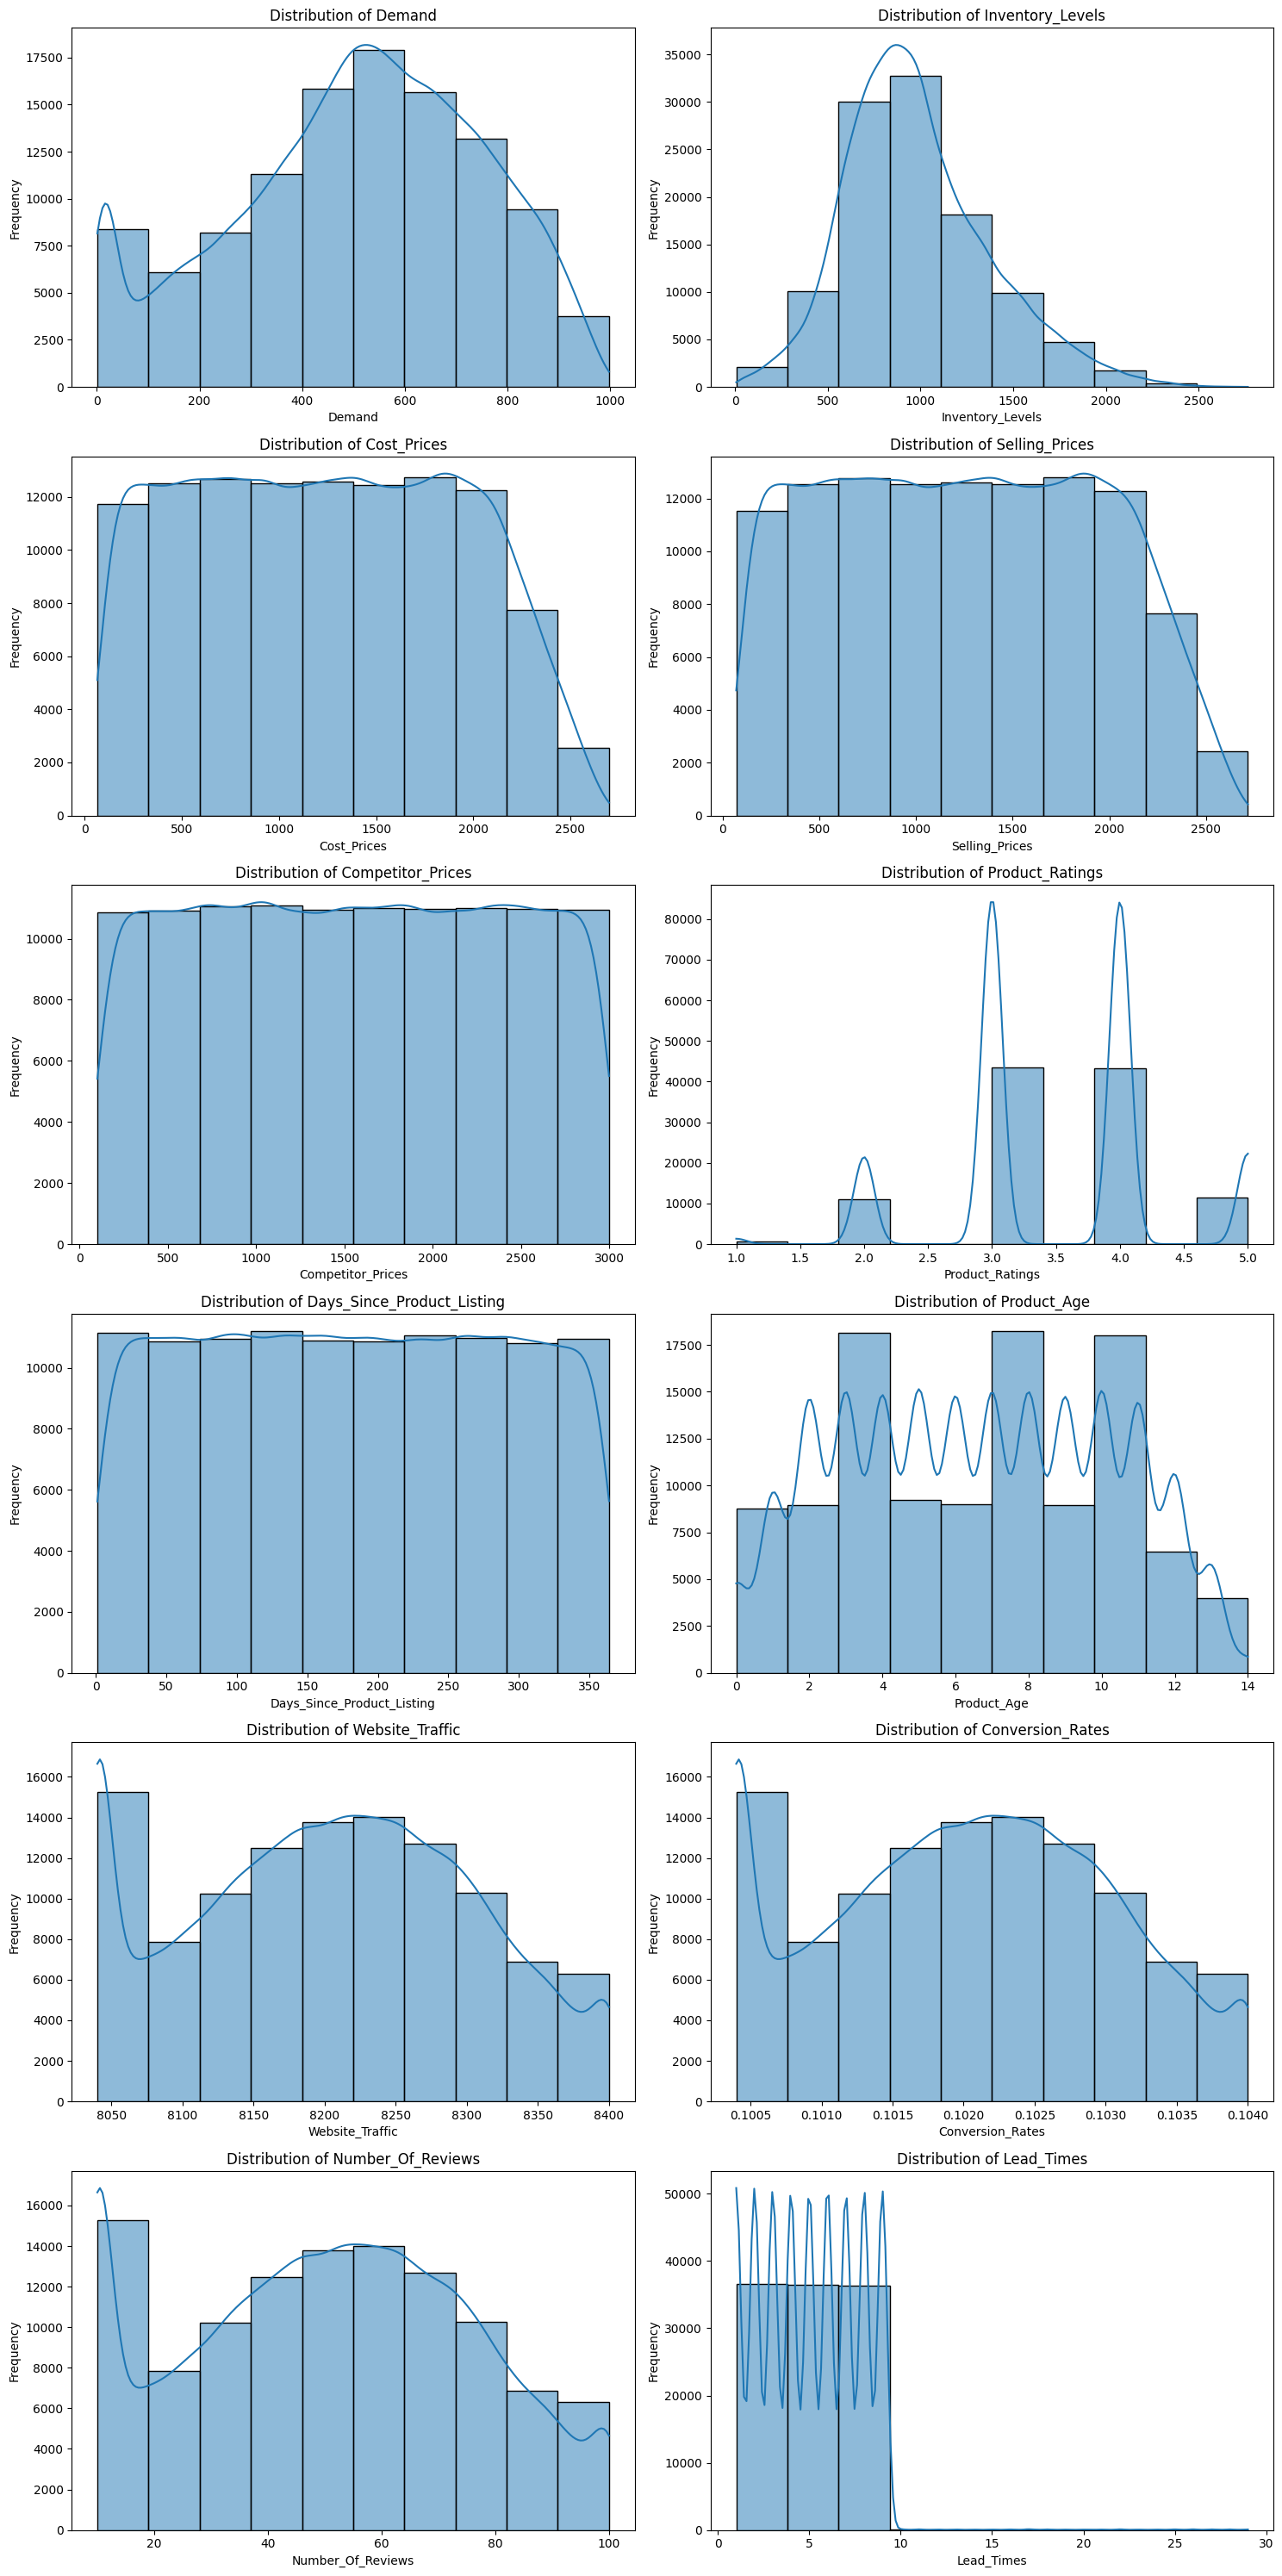

In [7]:
numerical_columns = [
                        'Demand', 'Inventory_Levels', 'Cost_Prices', 
                        'Selling_Prices', 'Competitor_Prices', 
                        'Product_Ratings', 'Days_Since_Product_Listing', 'Product_Age',
                        'Website_Traffic', 'Conversion_Rates', 'Number_Of_Reviews',
                        'Lead_Times', 'Customer_Ages'
                    ]

fig, axs = plt.subplots(len(numerical_columns)//2, 2, figsize=(15, 30))

for ax, col in zip(axs.flat, numerical_columns):
    sns.histplot(df[col], bins=10, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

From the univariate distribution seen above, a few things can be noted:
- **Distribution of** `Demand`: For most of the sales made, the demand was usually lower. More customers demanded smaller quantities of the products, mostly in the range of 300 to 800. Only very few demands were as high as 1000.
- **Distribution of** `Inventory_Levels`: For most products, the inventory level was usually between 500 and 1,500. There were very few times where the inventory level for a particular product was as high as 2,500.
- **Distribution of** `Cost_Prices`: The cost price of most of the products are in th range of 0 to 2,500.
- **Distribution of** `Selling_Prices`: The selling prices of the products were usually within the range of 0 to around 2,400, almost as if it is spread evenly within this range.
- **Distribution of** `Competitor_Prices`: The Competitor prices for the products seem to have an even distribution all across. With the prices ranging from 0 to 3,000.
- **Distribution of** `Product_Ratings`: The product ratings for the products mostly fell within 3.0 and 4.0. A few of the other ratings were on 2.0 and 5.0. Ratings of 1.0 were the lowest.
- **Distribution of** `Days_Since_Product_Listing`: There is an even distribution for this paramters. The days since product listing for the products, fell between 0 days and around 350 days.
- **Distribution of** `Product_Age`: A lot of products had their ages around 4, 8 and 11. While a bulk of other products had their  product age around 0, 2, 5, 6, 9 and 12.
- **Distribution of** `Website_Traffic`: Website traffic fell within 8,050 and 8,400.
- **Distribution of** `Conversion_Rates`: The conversion rate of customers fell within 10.05% and 10.35%.
- **Distribution of** `Number_Of_Reviews`: The number of reviews given for each product as at the time of purchase was within the range of 0 to 100.
- **Distribution of** `Lead_Times`: The lead times in days, was concentrated around 0 to 10.

#### 4.1.2. Univariate Analysis: Numerical Variables

This next step from here, is to now look at the categorical variables, and try to understand them and how the parameters within them are distributed. This will help us understand how these parameters affect sales frequency.

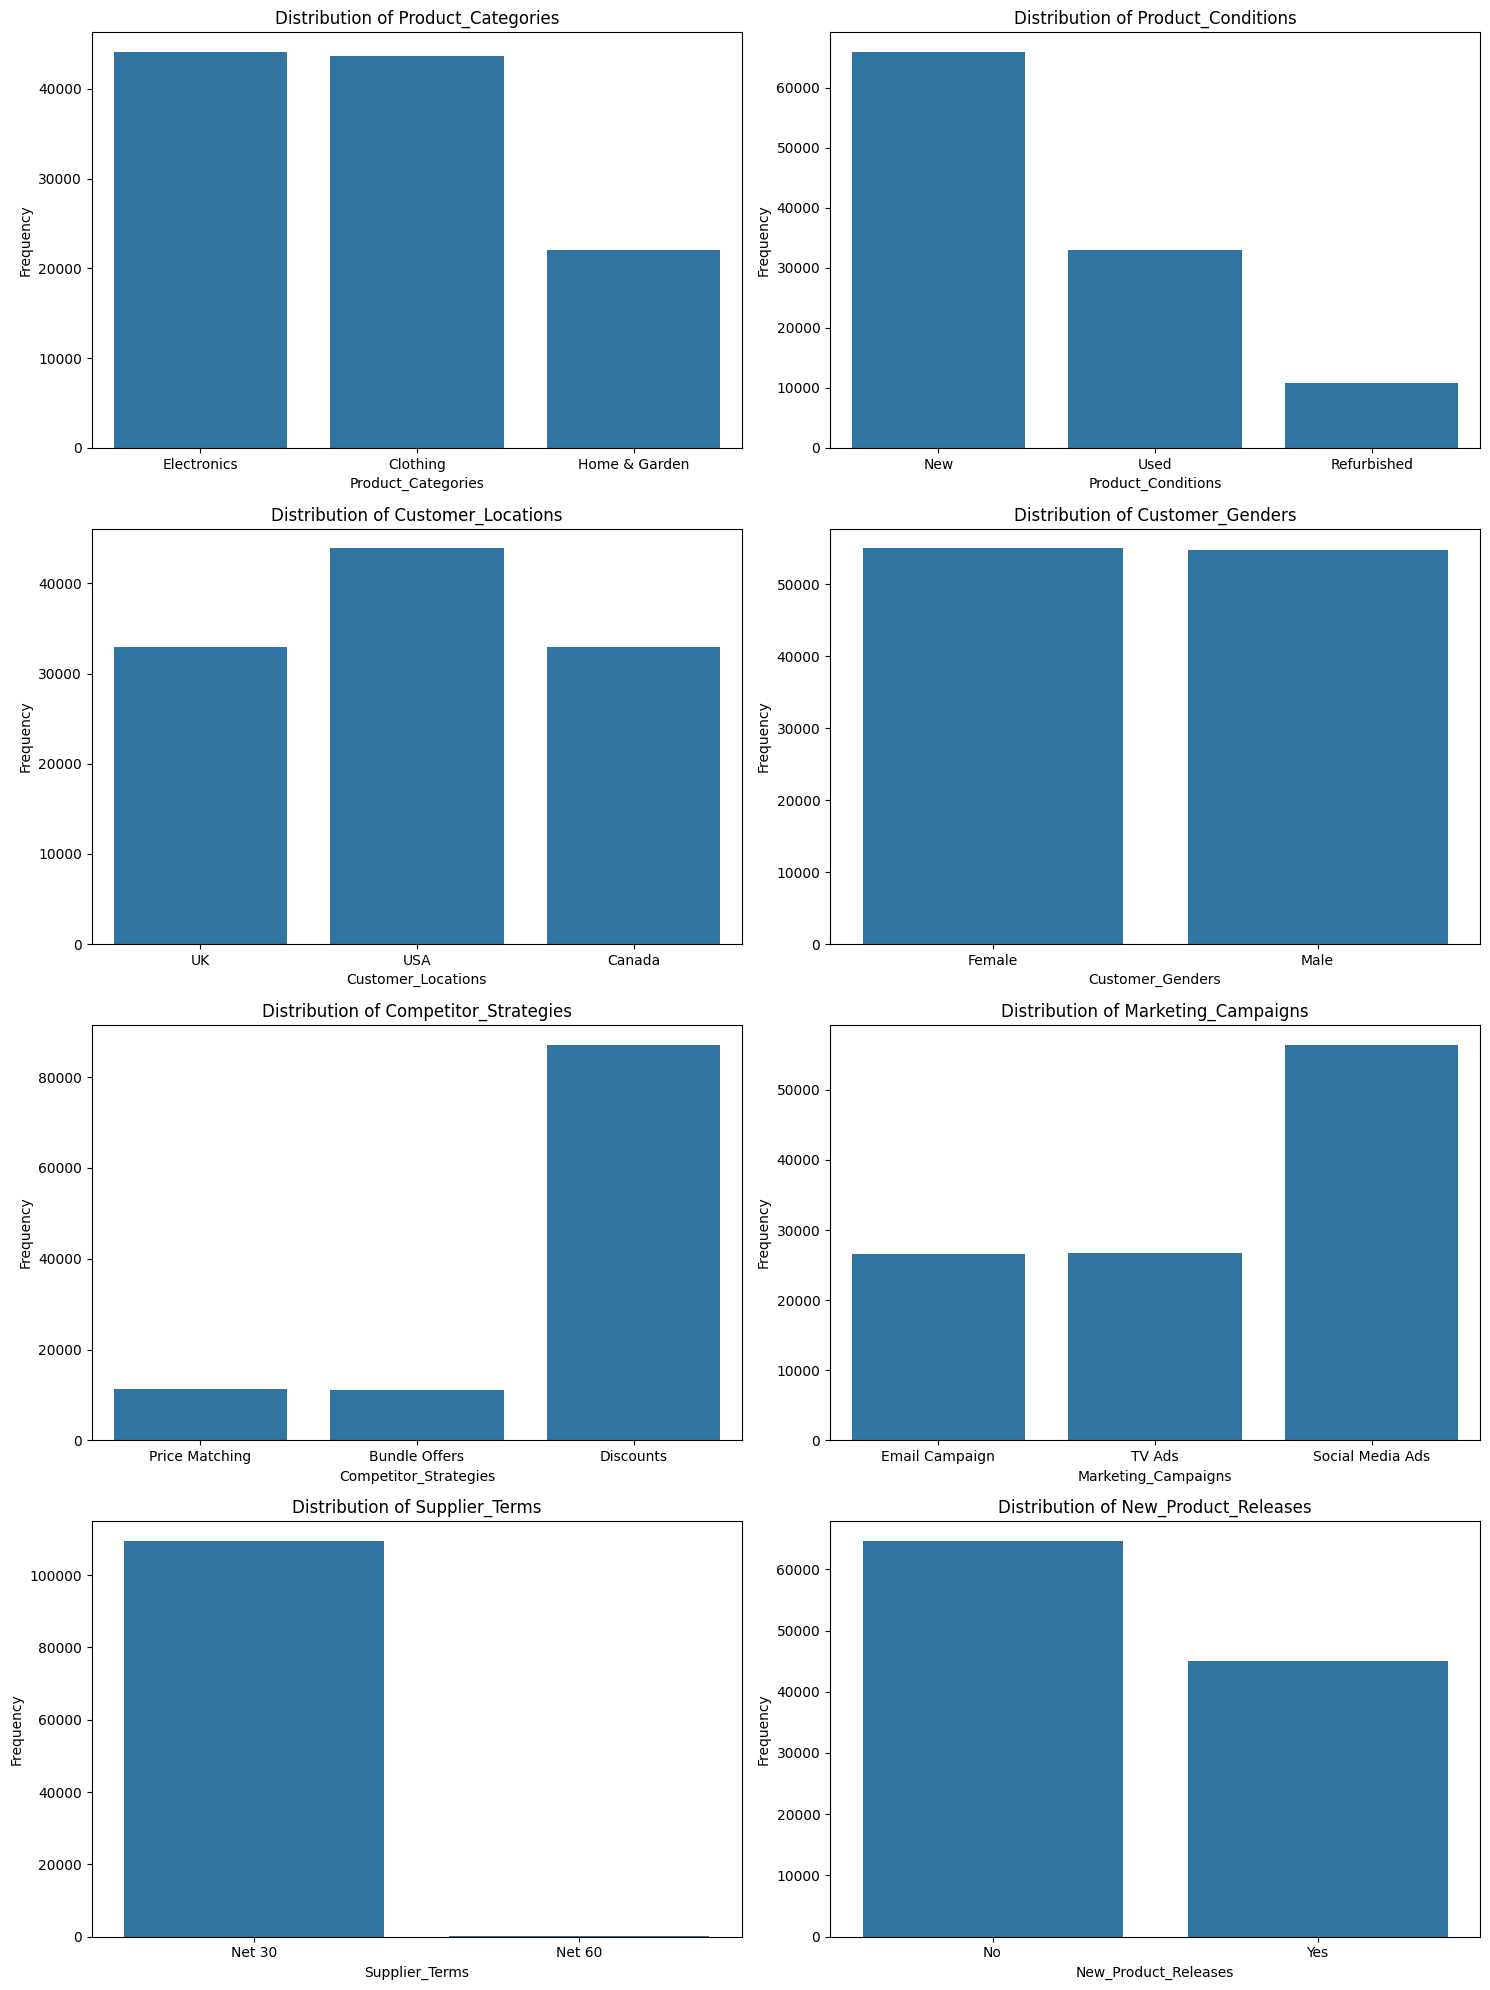

In [8]:
categorical_columns = [
       'Product_Categories', 'Product_Conditions', 'Customer_Locations', 
       'Customer_Genders', 'Competitor_Strategies', 'Marketing_Campaigns', 
       'Supplier_Terms', 'New_Product_Releases'
]

fig, axs = plt.subplots(len(categorical_columns)//2, 2, figsize=(15, 20))

for ax, col in zip(axs.flat, categorical_columns):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Distribution of** `Product_Categories`: The most frequently sold products, were in the the `Electronics` and - **Distribution of** `Clothing` category.
- **Distribution of** `Product_Conditions`: `New` products were the most frequently sold, while `Used` products followed. `Refurbished` products had the least frequency.
- **Distribution of** `Customer_Locations`: Customers in the `USA` made the most frequent purchases, than customers in the `UK` or `Canada`.
- **Distribution of** `Customer_Genders`: Gender did not seem to have any correlation with sales frequency.
- **Distribution of** `Competitor_Strategies`: The competitor stratagies at the current time was mostly `Discounts`. `Price Matching` and `Bundle Offers` were the least frequently used strategy by the competitor.
- **Distribution of** `Marketing_Campaigns`: This was mostly done with `Social Media Ads`. `TV Ads` and `Email Campaign` were the least.
- **Distribution of** `Supplier_Terms`: The supplier terms for supplying the goods mostly fell within `Net 30`.
- **Distribution of** `New_Product_Releases`: Most of the products that were sold didn't have any new releases.

### 4.2. Bivariate Analysis

As desribed before, we will look at pairs of features of the dataset. The main goal here is to identify relationships between multiple pairs of variables, and see if there are relationships between them. We will approach these in multiple steps,
- Bivariate Analysis of Pairs of Numerical Variables,
- Bivariate Analysis of Pairs of Categorical Variables,
- Bivariate Analysis of Pairs of Numerical and Categorical Variables.

#### 4.2.1. Bivariate Analysis: Pairs of Numerical Variables

We will be analysing pairs of numerical variables here.

We will begin by looking at the numerical parameters that are highly related to demand and sales. We are going to be making a pairplot of these parameters. These variables include:
- `Demand`,
- `Inventory_Levels`,
- `Cost_Prices`,
- `Selling_Prices`,
- `Competitor_Prices`,
- `Website_Traffic`.

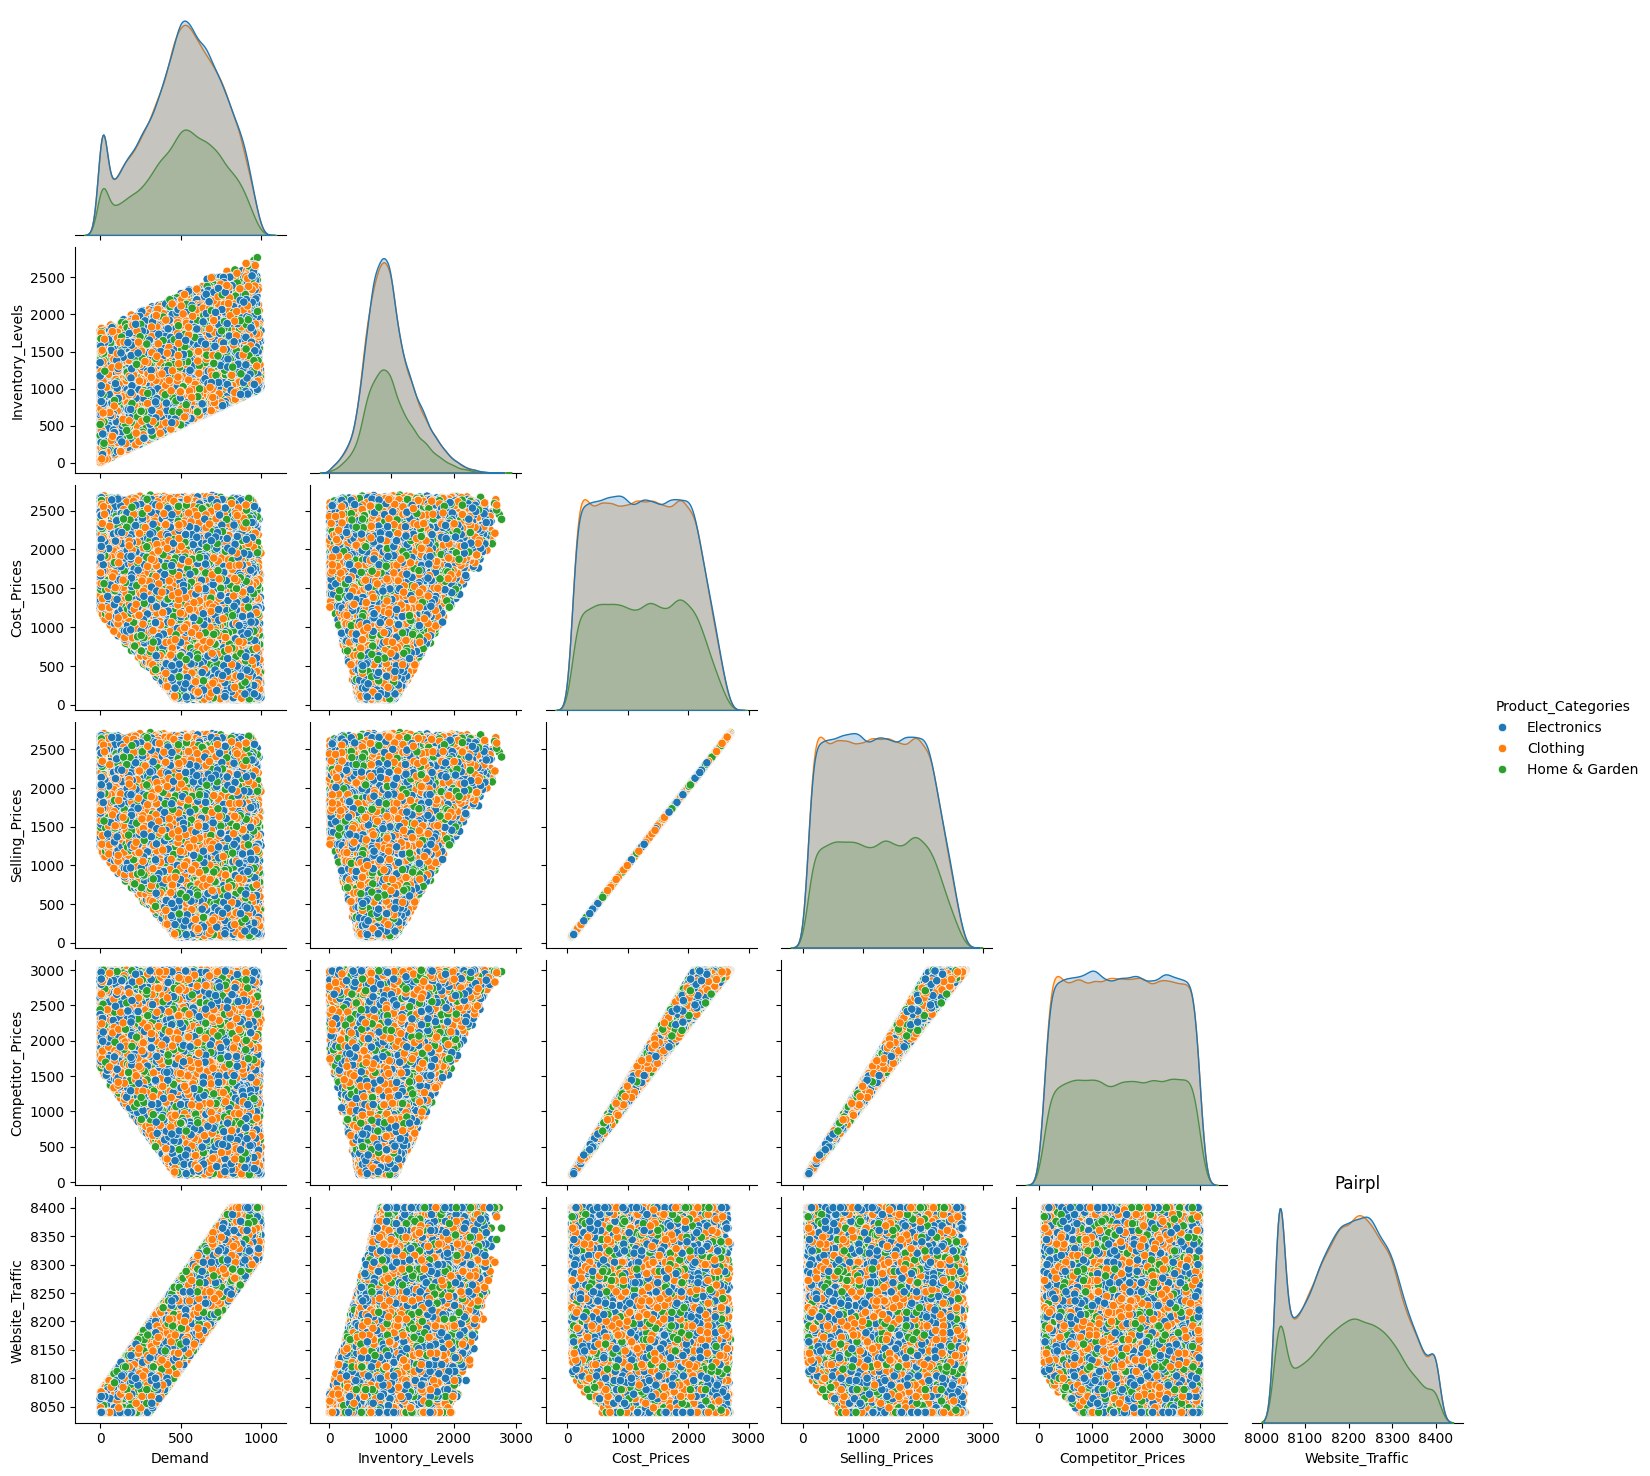

In [9]:
num_pairplot_cols = ['Demand', 'Inventory_Levels', 'Cost_Prices', 
                     'Selling_Prices', 'Competitor_Prices', 'Product_Categories',
                     'Website_Traffic']

sns.pairplot(data=df[num_pairplot_cols], 
             hue='Product_Categories',
             corner=True)
plt.title('Pairplot')
plt.show()

From the pairplot, we can see that:
There is a highly linear relationship between:
- `Selling_Prices` and `Cost_Prices`: This expected, as te price you sell is going to be highly dependent on the price at which you buy your products.
- `Competitor_Prices` and `Cost_Prices`: This is also expected as the competitor prices will also have a linear relationship with the cost price of the company.
- `Competitor_Prices` and `Selling_Prices`: The competitor prices and the selling prices of the company is expected to be linear becuase one can assume that they buy their products almost at the same price range.
- `Website_Traffic` and `Demand`: This relationship seems to indicate that traffic drives the demand of products.

There is some very moderate \[linear\] relationship between:
- `Inventory_Levels` and `Demand` (linear),
- `Cost_Prices` and `Demand` (inverse),
- `Selling_Prices` and `Demand` (inverse),
- `Competitor_Prices` and `Demand` (inverse),
- `Competitor_Prices` and `Inventory_Levels` (linear).

As for the other pairs of variables, there doesn't seem to be any easily identifiable relationship between them.

The next thing we are going to look at now is the correlation between these numerical variables. We would like to see just how much correlation exists between them.

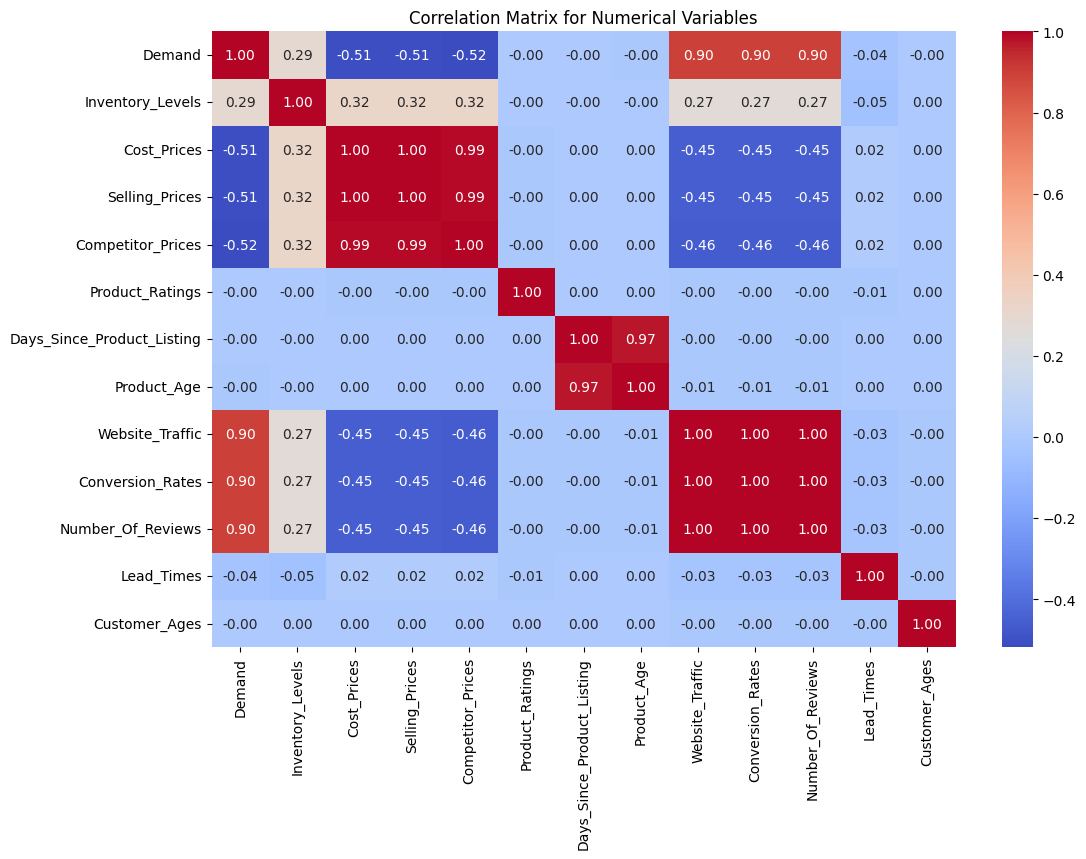

In [10]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

From this, we can easily see that:
- There's very high correlation (0.99-1.00) between `Selling_Prices`, `Competitor_Prices` and `Cost_Prices`. This should be so, because the price at which a product is sold is heavily determined by the price at which it was acquired.
- There is some high correlation (0.9) between `Demand` and the other variables `Website_Traffic`, `Conversion_Rates`, `Number_Of_Reviews`.
- There is some moderate correlation (0.29-0.32) between `Inventor_Levels` and other variables `Demand`, `Cost_Prices`, `Selling_Prices`, `Competitor_Prices`, `Website_Traffic`, `Conversion_Rates`, `Number_Of_Reviews`.
- There is some moderate inverse correlation (-0.51) between `Demand` and the other variables `Selling_Prices`, `Competitor_Prices` and `Cost_Prices`. This indicates that cheaper products tend to have the highest demands.

#### 4.2.2. Bivariate Analysis: Pairs of Categorical Variables

We will be analysing pairs of categorical variables here.

Some of the categorical variables we will be working with here will include:
- `Product_Categories`,
- `Product_Conditions`,
- `Customer_Locations`,
- `Customer_Genders`,
- `Competitor_Strategies`,
- `Marketing_Campaigns`,
- `New_Product_Releases`.

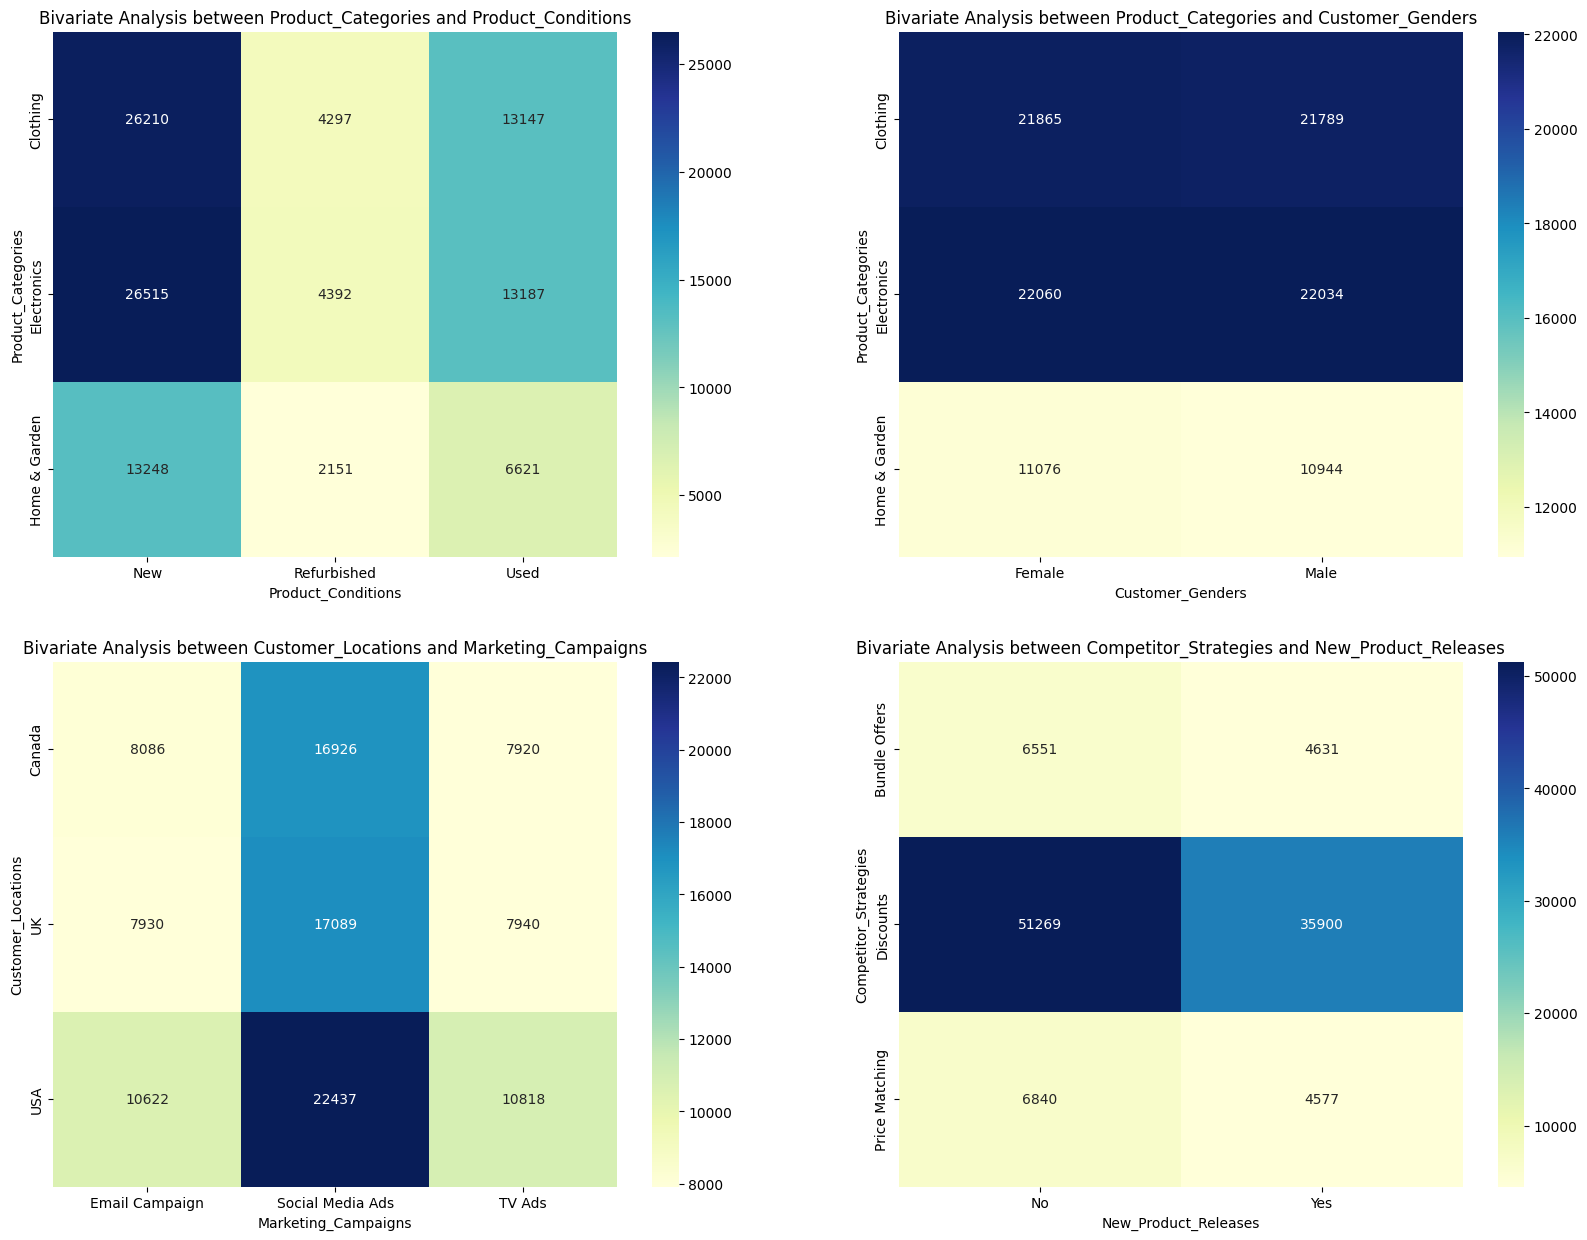

In [11]:
# Performing Bivariate Analysis on selected pairs of categorical variables
# Limiting to a few combinations due to the large number of possible pairs
selected_pairs = [
    ('Product_Categories', 'Product_Conditions'),
    ('Product_Categories', 'Customer_Genders'),
    ('Customer_Locations', 'Marketing_Campaigns'),
    ('Competitor_Strategies', 'New_Product_Releases')
]

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

for (column1, column2), ax in zip(selected_pairs, axs.flat):
    crosstab = pd.crosstab(df[column1], df[column2])
    sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu", ax=ax)
    ax.set_title(f"Bivariate Analysis between {column1} and {column2}")
    ax.set_xlabel(column2)
    ax.set_ylabel(column1)

plt.show()

From he above plots, we see that:
- For `Product_Categories` and `Product_Conditions`:
    - A majority of the product are new products, with most of the new products being `Clothing` and `Electronics`.
    - Used products had the second higest sales frequency, with products in `Clothing` and `Electronics` taking the higest frequency.
    - `Refurbished` products had the least frequency.
- For `Product_Categories` and `Customer_Genders`:
    - There were no significant differences between sales frequency for `Male` and `Female`.
    - Products in `Electronics` and `Clothing` still had the highest sales frequency.
- For `Customer_Locations` and `Marketing_Campaigns`:
    - `Social Media Ads` was the most frequent form of marketing. `Email Campaign` and `TV Ads` had the lowest frequency of the three marketing strategies.
    - Customers in `USA` were targeted the most. Customers in the `UK` and `Canada` were targeted fairly equally.
- For `Customer_Strategies` and `New_Product_Releases`:
    - Giving `Discounts` was the most frequent strategy employed by competitors, with `Price Matching` and `Bundle Offers` coming in second and third.
    - Most of the products were not new releases.

#### 4.2.3. Bivariate Analysis: Pairs of Numerical and Categorical Variables

We will be analysing pairs of numerical and categorical variables here.

Some of the pairs of numerical and categorical variables we will be working with here will include:
- `Demand` and `Product_Categories`,
- `Demand` and `Product_Conditions`,
- `Demand` and `Customer_Locations`,
- `Demand` and `Competitor_Strategies`,
- `Demand` and `Product_Ratings`,
- `Selling_Prices` and `Product_Categories`,
- `Selling_Prices` and `Product_Conditions`,
- `Competitor_Prices` and `Product_Categories`,
- `Competitor_Prices` and `Product_Conditions`,
- `Inventory_Levels` and `Marketing_Campaigns`.

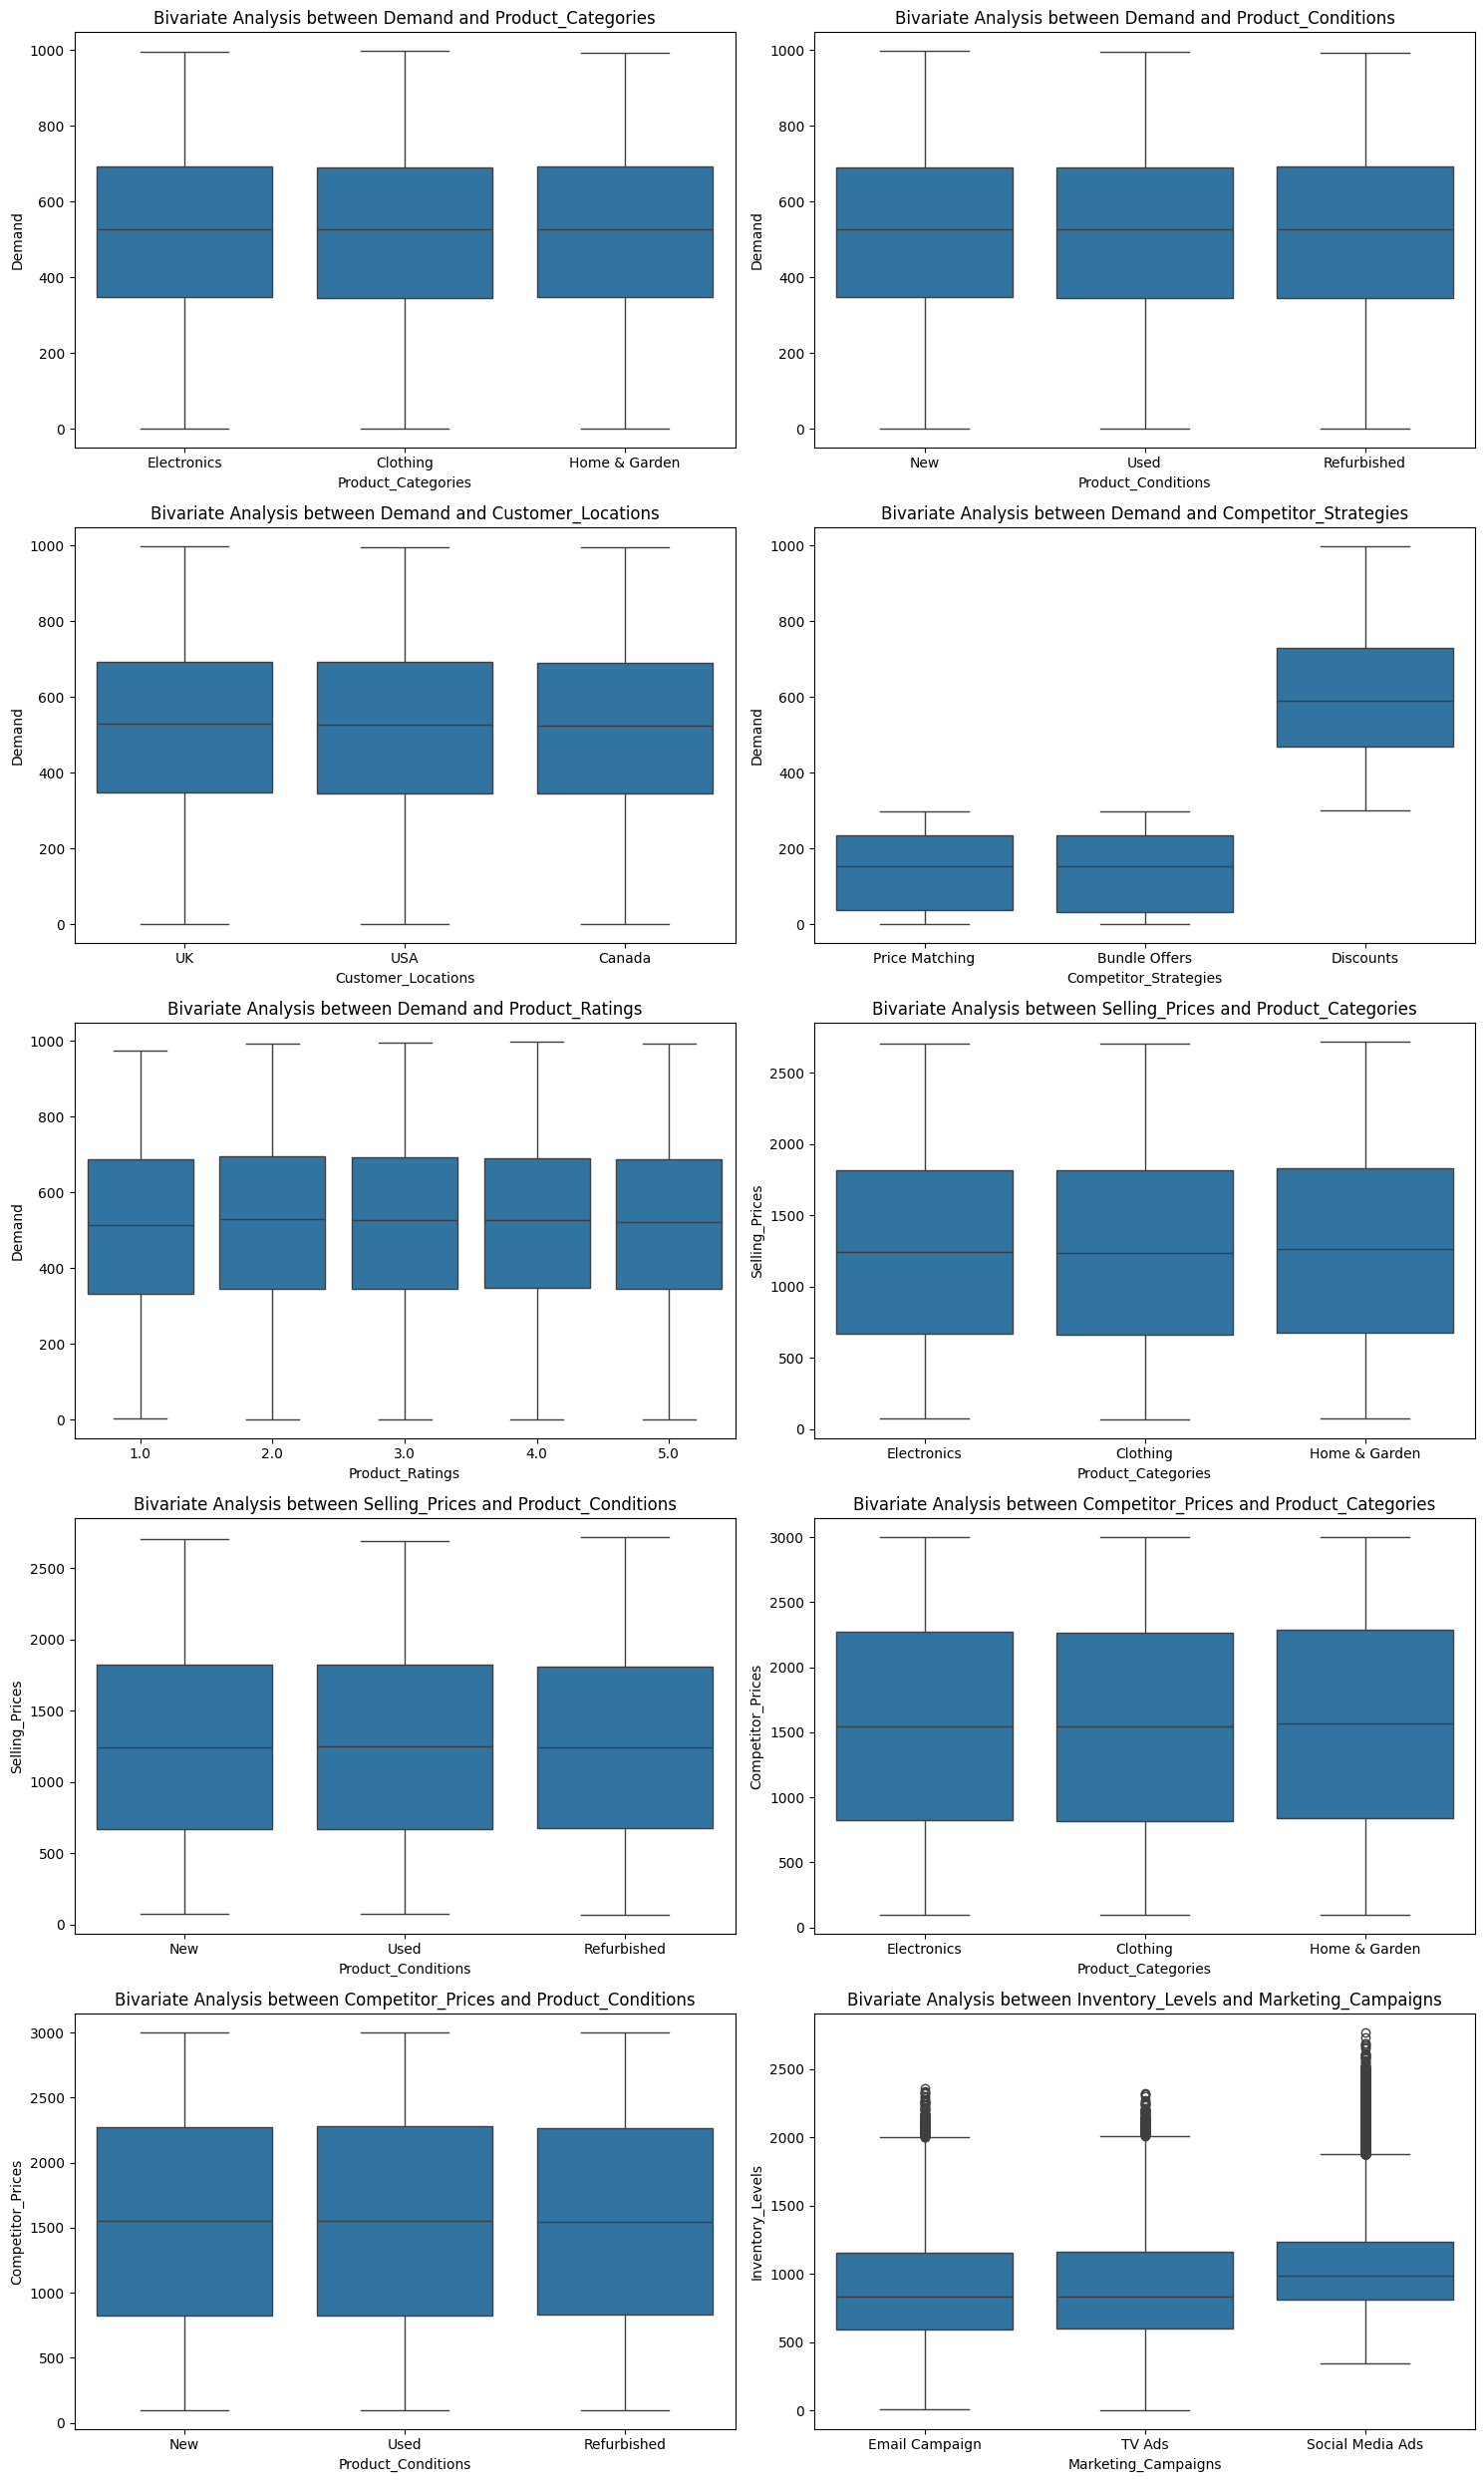

In [12]:
selected_num_cat_pairs = [
    ('Demand', 'Product_Categories'),
    ('Demand', 'Product_Conditions'),
    ('Demand', 'Customer_Locations'),
    ('Demand', 'Competitor_Strategies'),
    ('Demand', 'Product_Ratings'),
    ('Selling_Prices', 'Product_Categories'),
    ('Selling_Prices', 'Product_Conditions'),
    ('Competitor_Prices', 'Product_Categories'),
    ('Competitor_Prices', 'Product_Conditions'),
    ('Inventory_Levels', 'Marketing_Campaigns')
]

fig, axs = plt.subplots(5, 2, figsize=(15, 25))

for (num_col, cat_col), ax in zip(selected_num_cat_pairs, axs.flat):
    sns.boxplot(x=cat_col, y=num_col, data=df, ax=ax)
    ax.set_title(f"Bivariate Analysis between {num_col} and {cat_col}")
    ax.set_xlabel(cat_col)
    ax.set_ylabel(num_col)

plt.tight_layout()
plt.show()

As seen from the plots above,
- `Demand` and `Product_Categories`: There doesn't seem to be any difference in the distribution of demand for the different product categories.
- `Demand` and `Product_Conditions`: There doesn't also seem to be any difference in the distribution of demand for the different product when categorized by their conditions.
- `Demand` and `Customer_Locations`: There is no difference in the distribution of demand by customer location.
- `Demand` and `Competitor_Strategies`: As seen here, there tend to be more demand for the products when there is `Discounts`. We can speculate that when the competitors add a discount on a product, it may make their customers to buy the product heavily, thereby making the demand for the same products from our company to increase.
- `Demand` and `Product_Ratings`: There is no significant difference in the distribution of the demand against product ratings.
- `Selling_Prices` and `Product_Categories`: There is no significant difference in the distribution of the selling prices for each of the product categories.
- `Selling_Prices` and `Product_Conditions`: There is no difference between the distributions of the selling prices for each of of the product conditions.
- `Competitor_Prices` and `Product_Categories`: There is no significant difference in the distribution of competitor prices for each product category.
- `Competitor_Prices` and `Product_Conditions`: There is no significant difference in the distribution of competitor prices for each product conditions.
- `Inventory_Levels` and `Marketing_Campaigns`: There is some slight differences between the inventory levels and te various marketing campaigns used at the time. There is some indication that `Inventory_Levels` are slightly higher when marketing is done with `Social Media Ads` than `Email Campaign` and `TV Ads`. This is evident in the range of distributions of the three classes, and the positions of their median values.

### 4.3. Profit Margin Analysis

Here, we just want to briefly look at the profit distribution for each sale.

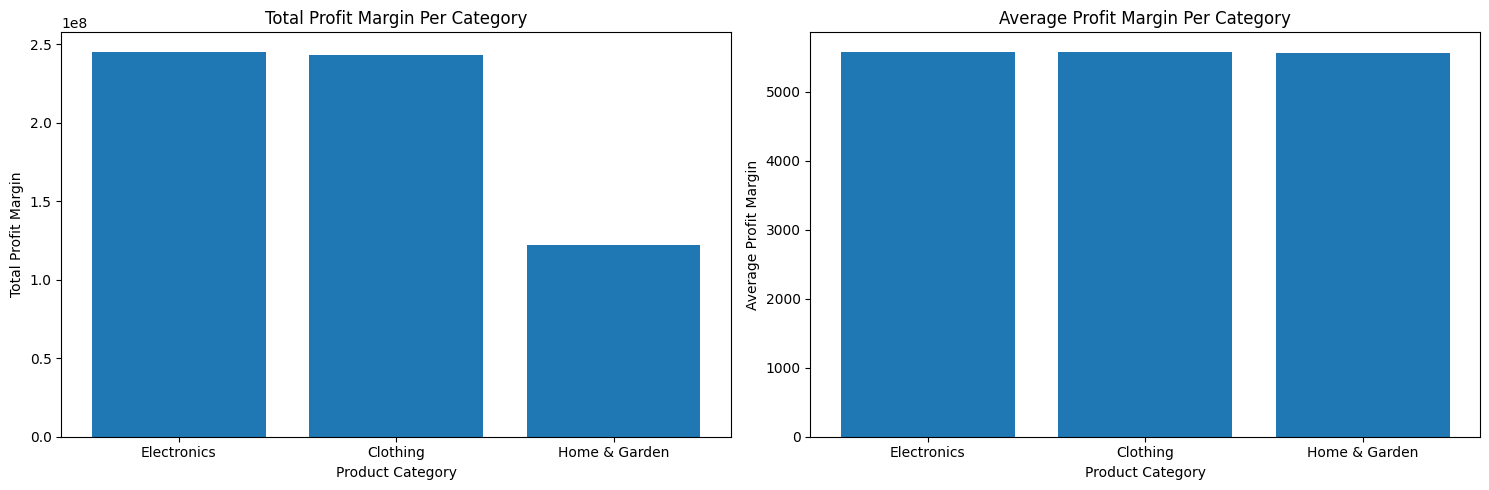

In [13]:
product_categories = df['Product_Categories'].unique()

profit_margin_data = {'Total Profit Margin': [],
                      'Average Profit Margin': []}

for i, product in enumerate(product_categories):
    category_data = df[df['Product_Categories'] == product]
    profit_margin_data['Total Profit Margin'].append(np.sum((category_data['Selling_Prices'] \
                                                             - category_data['Cost_Prices']) \
                                                                * category_data['Demand']))
    profit_margin_data['Average Profit Margin'].append(np.mean((category_data['Selling_Prices'] \
                                                                - category_data['Cost_Prices']) \
                                                                * category_data['Demand']))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].bar(x=product_categories, height=profit_margin_data['Total Profit Margin'])
ax[0].set_title('Total Profit Margin Per Category')
ax[0].set_ylabel('Total Profit Margin')
ax[0].set_xlabel('Product Category')

ax[1].bar(x=product_categories, height=profit_margin_data['Average Profit Margin'])
ax[1].set_title('Average Profit Margin Per Category')
ax[1].set_ylabel('Average Profit Margin')
ax[1].set_xlabel('Product Category')

plt.tight_layout()
plt.show()

From the plot:
- Total revenue on goods is lowest for goods in the `Home & Garden` category. The other categories have almost equal profit margins.
- Average revenue on goods is almost equal for all product categories.

### 4.4. Temporal Analysis

Here, we will be briefly looking at how some of the parameters in the dataset change with time. The parameters we will be looking at includes:
- `Demand`,
- `Inventory_Levels`,
- `Selling_Prices`,
- `Competitor_Prices`.

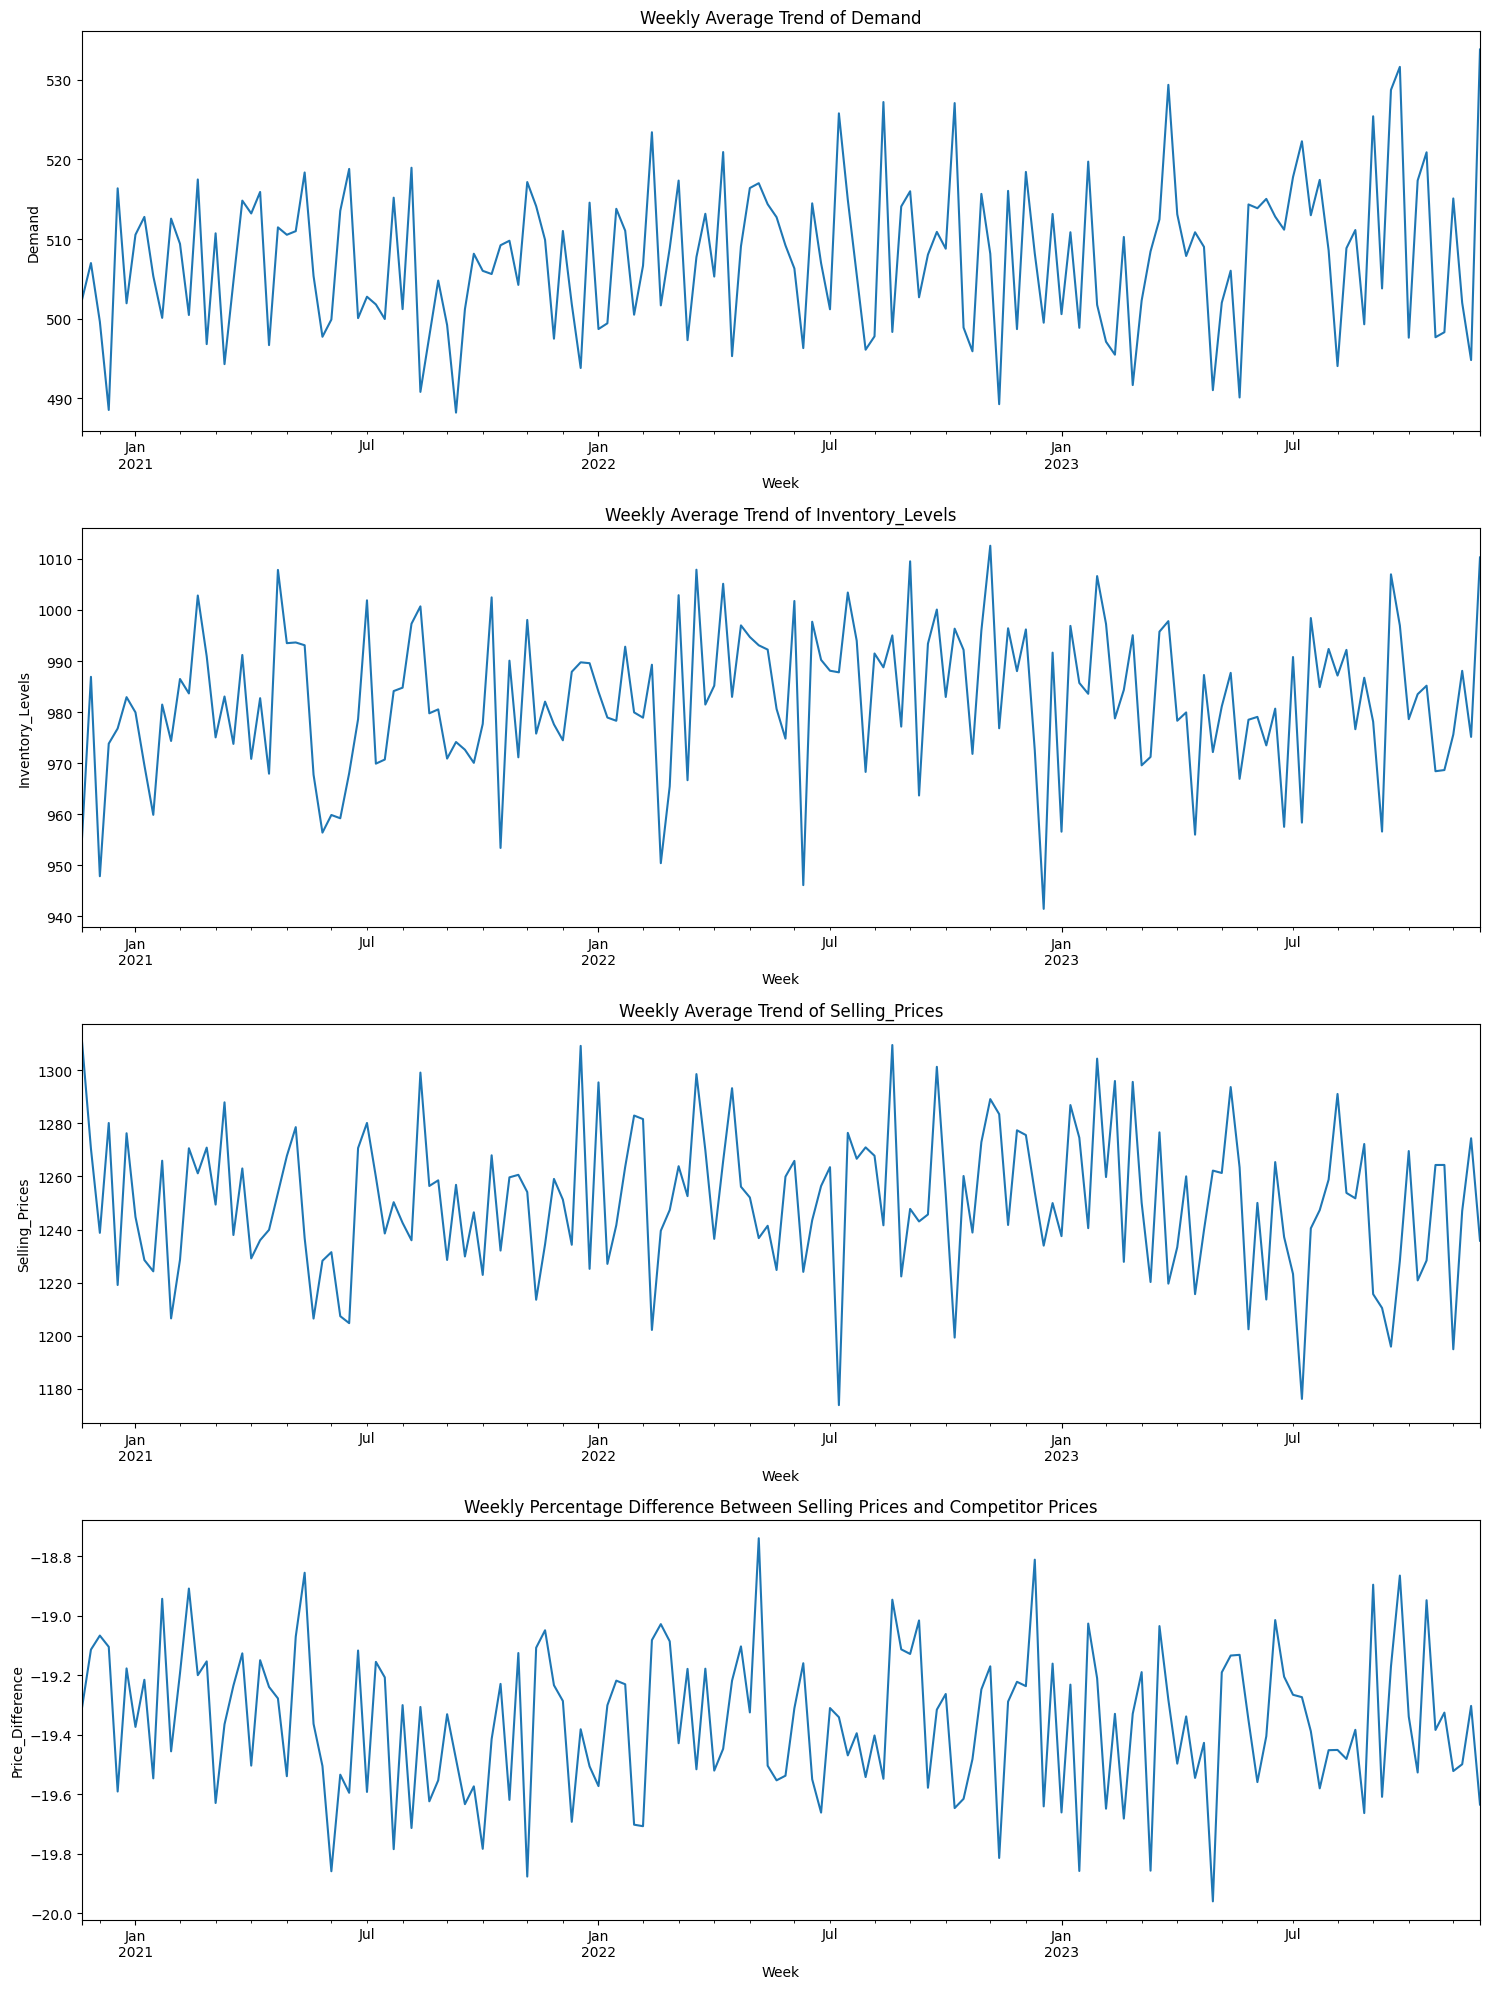

In [14]:
# Converting the 'Timestamp' column to datetime
df_ = df.copy()
df_['Timestamp'] = pd.to_datetime(df_['Timestamp'])

# Setting the timestamp as the index
df_.set_index('Timestamp', inplace=True)

# Resampling data on a weekly basis
weekly_data = df_.resample('W').mean(numeric_only=True)

# Plotting temporal trends for key parameters
def plot_temporal_trends(df_, column, title, ax):
    df_[column].plot(ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Week')
    ax.set_ylabel(column)

fig, axs = plt.subplots(4, 1, figsize=(15, 20))

# Plotting temporal trends for selected parameters
trend_columns = ['Demand', 'Inventory_Levels', 'Selling_Prices']
for i, col in enumerate(trend_columns):
    plot_temporal_trends(weekly_data, col, f"Weekly Average Trend of {col}", axs[i])

# Calculating the difference between Selling Prices and Competitor Prices
weekly_data['Price_Difference'] = (weekly_data['Selling_Prices'] - weekly_data['Competitor_Prices']) * 100 / weekly_data['Competitor_Prices']

# Plotting the weekly difference in selling prices and competitor prices
plot_temporal_trends(weekly_data, 
                     'Price_Difference', 
                     "Weekly Percentage Difference Between Selling Prices and Competitor Prices",
                     ax=axs[3])

plt.tight_layout()
plt.show()

From the plots above,
- There is no observable weekly pattern in `Demand`, `Inventory_Levels` and `Selling_Prices`.
- However, it is observed that the competitor pricing was always higher than the selling price of our company, as seen from the negative values in the difference in selling prices and competitor prices.

## 5. Feature Engineering

Since we are going to be building models for demand forecasting and price optimization, we will need to prepare the dataset. And that is what we are going to be doing in this section. We will basically be splitting our data into train and test sets, and then visualize this split. We will train with the data for years below 2023, and then evaluate on data from the year 2023.

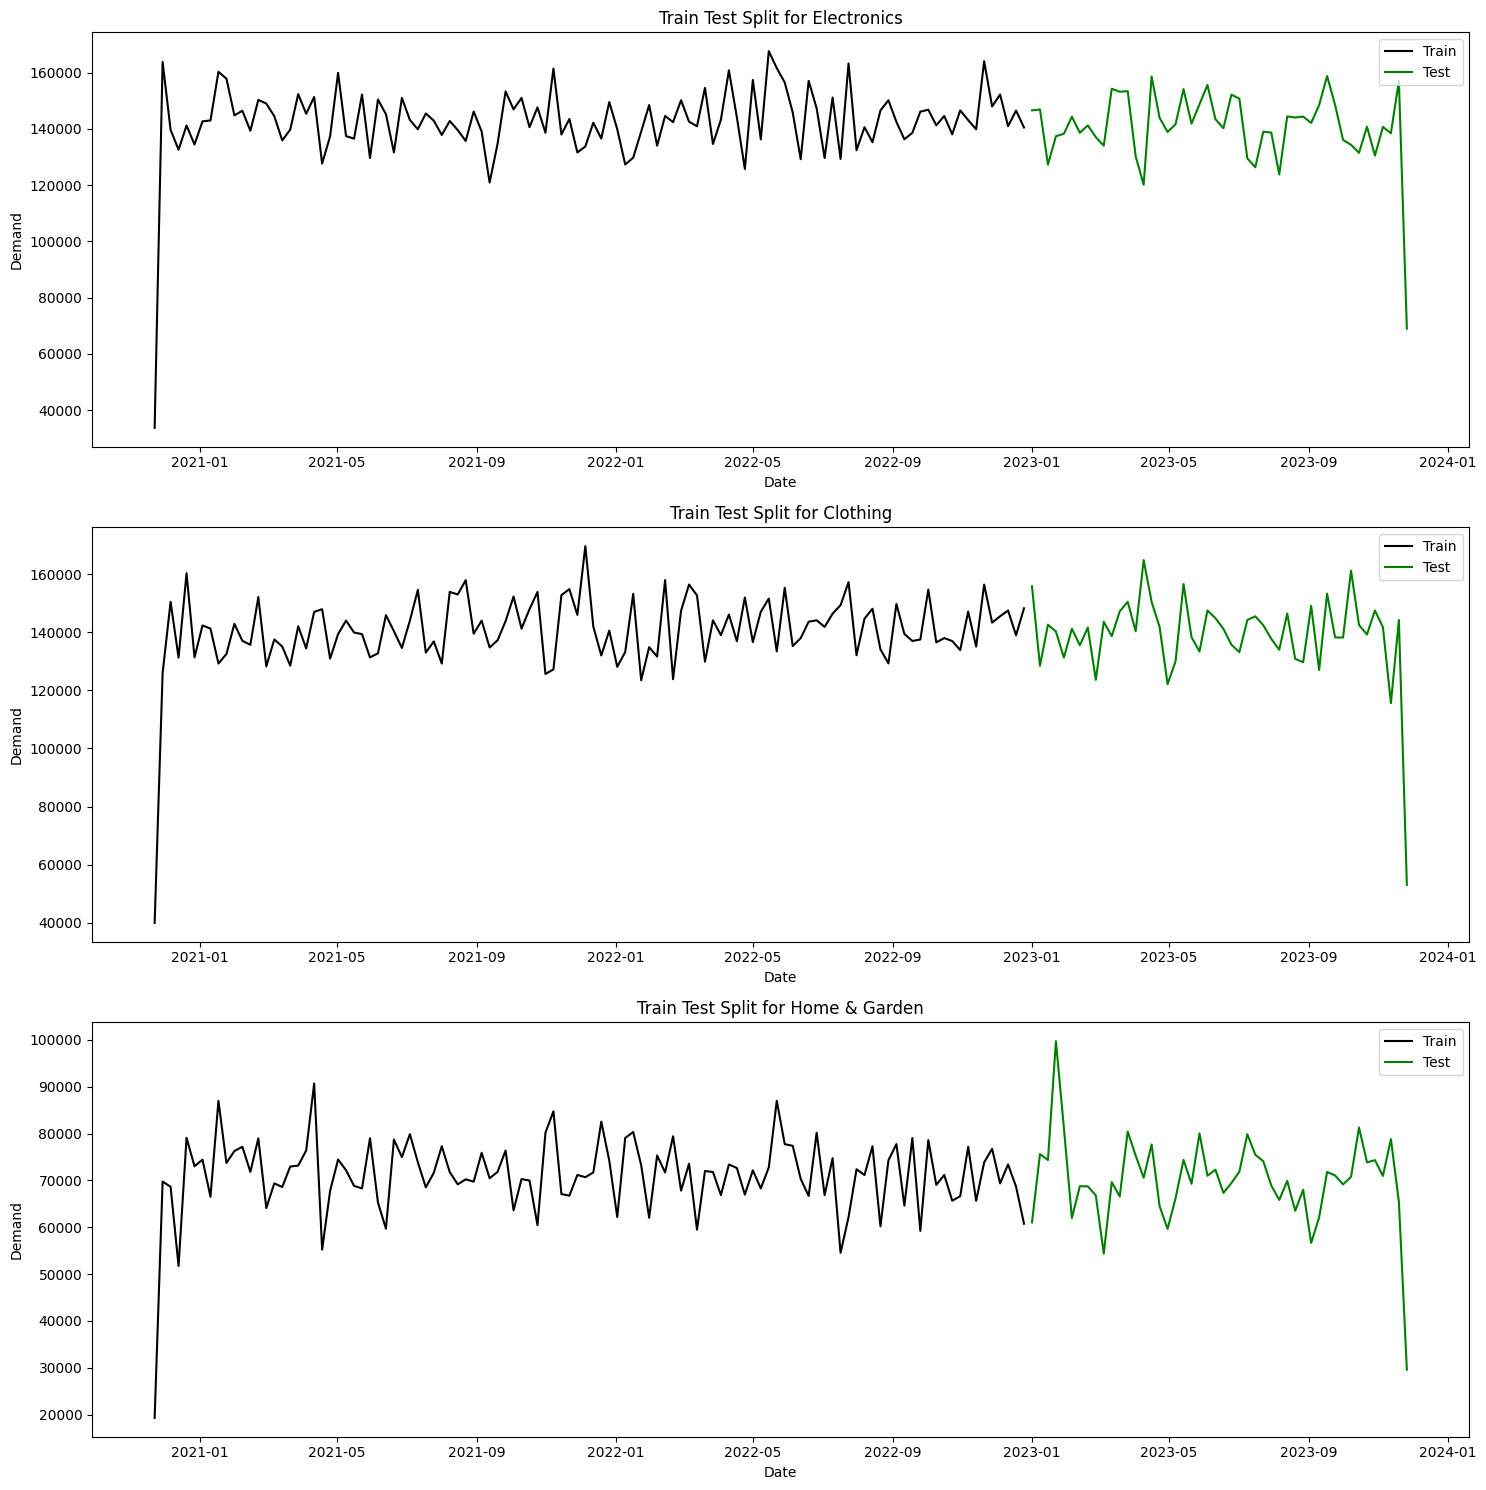

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

product_categories = df['Product_Categories'].unique()

train_data = dict()
test_data = dict()

fig, ax = plt.subplots(3, 1, figsize=(15, 15))

for i, product in enumerate(product_categories):

    # Filter for a specific category
    category_data = df[df['Product_Categories'] == product]

    # Prepare time series data
    category_data.set_index('Timestamp', inplace=True)

    # Weekly resampling
    category_data = category_data.resample('W').sum(numeric_only=True)

    # Split the data into train and test sets
    train = category_data.loc[category_data.index.year < 2023]
    train = train['Demand']

    test = category_data.loc[category_data.index.year >= 2023]
    test = test['Demand']

    # Save the data
    train_data[product] = train
    test_data[product] = test

    ax[i].plot(train.index, train, color='black')
    ax[i].plot(test.index, test, color='green')
    ax[i].set_title(f'Train Test Split for {product}')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Demand')
    ax[i].legend(['Train', 'Test'], loc='upper right')

plt.tight_layout()
plt.show()

## 6. Demand Forecasting

Here, we are going to first build a model that can estimate future demand of the products. We are going to build individual models for each of the product categories; `Electronics`, `Clothing`, `Home & Garden`. And and what we're going to do is make estimates for future sales on a **weekly basis**. We will build an Exponential Smoothing model.

The model we will be building will be evaluated with three metrics:
- Root Mean Squared Error (RMSE),
- Mean Absolute Error (MAE),
- Mean Absolute Percentage Error (MAPE).

We will now build an Exponential Smoothing model to predict future demands on the train dataset, evaluate the model on our test dataset, and visualize the results.

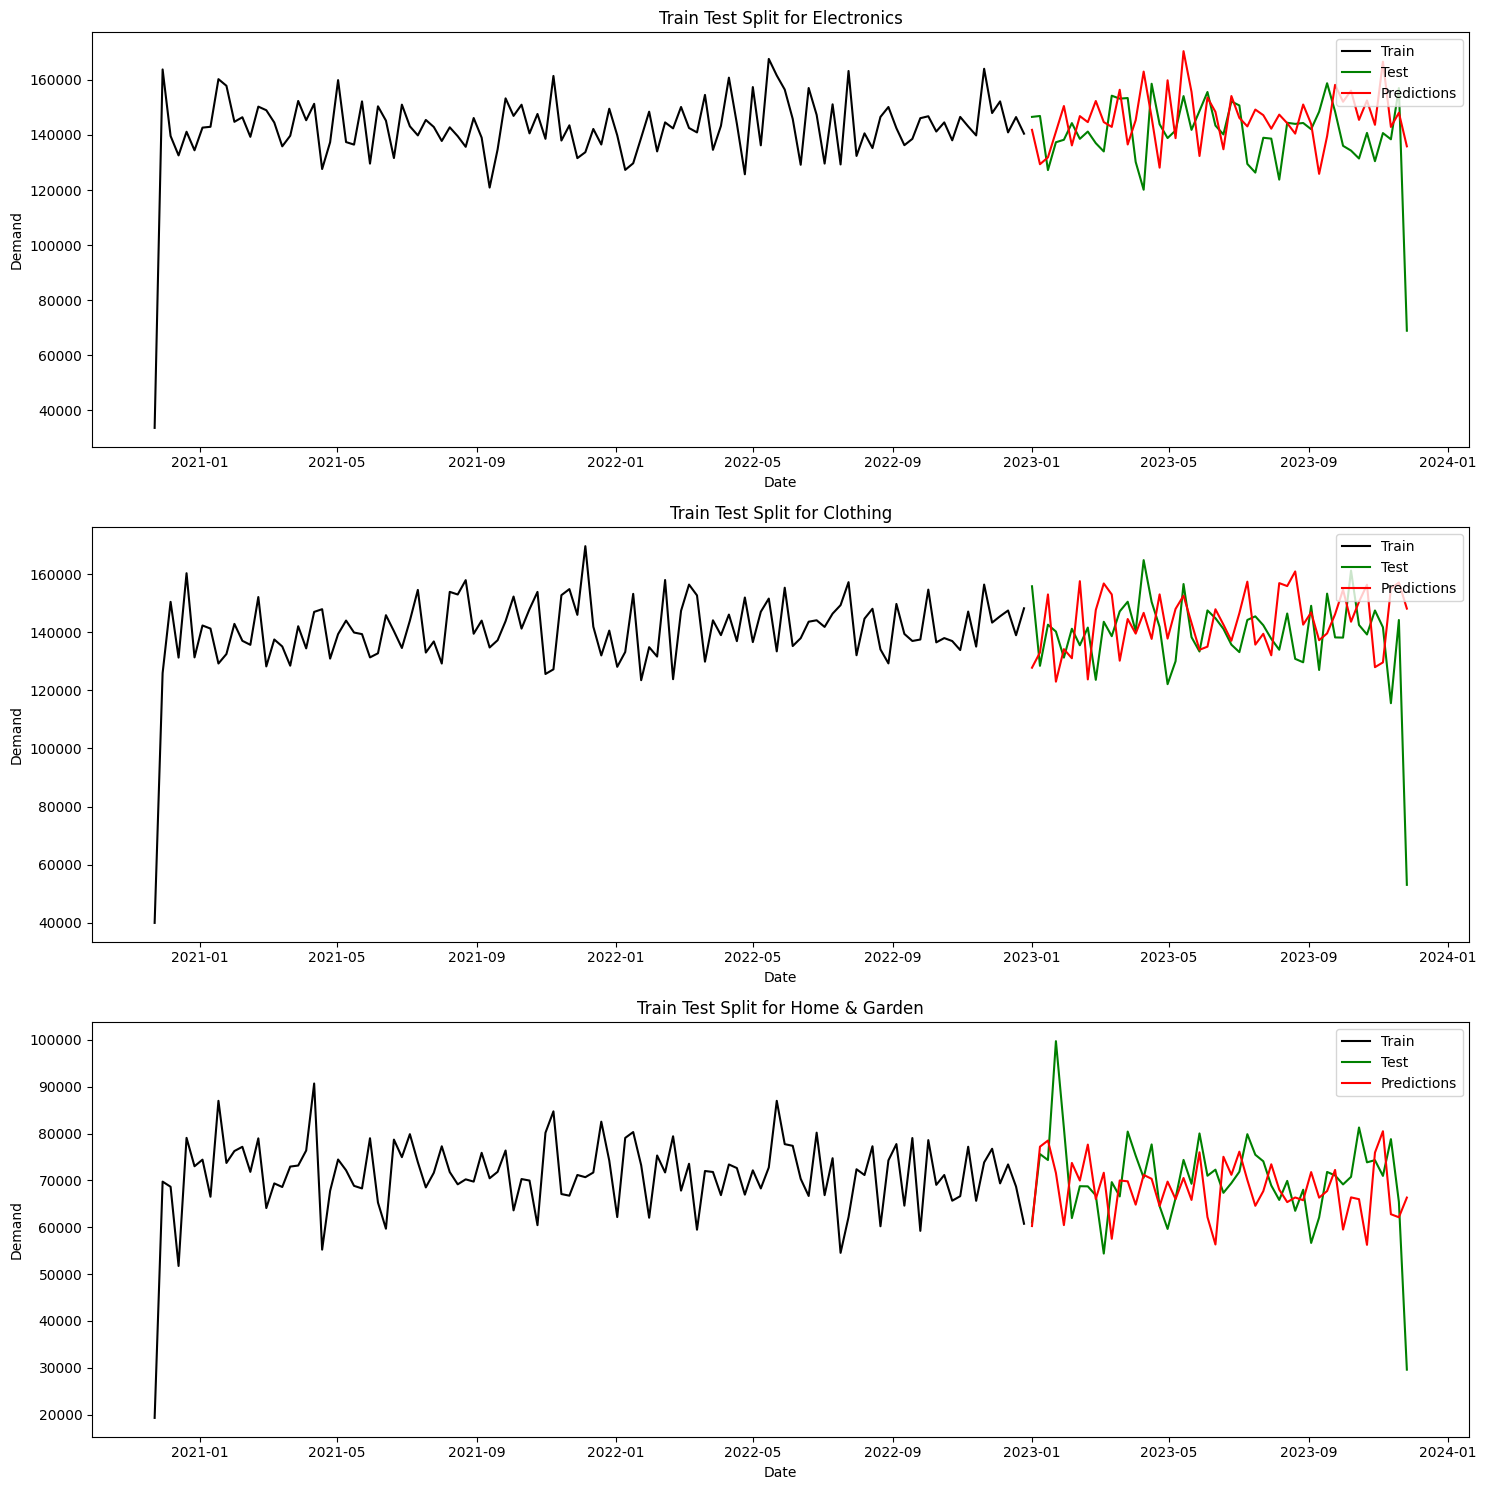

RMSE: 16060.662310159467
MAE: 11674.166229745448
MAPE: 11.81385987888615


In [16]:
# Save ARIMA MAPE scores
es_mape = dict()

# Save models
es_models = dict()

rmse, mae, mape = 0, 0, 0

fig, ax = plt.subplots(3, 1, figsize=(15, 15))

for i, product in enumerate(product_categories):

    # Get train and test sets
    train = train_data[product]
    test = test_data[product]

    # Fit Exponential Smoothing model
    model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=52)
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.forecast(steps=48)

    # Save models
    es_models[product] = model_fit

    product_rmse = mean_squared_error(test, predictions, squared=False)
    product_mae = mean_absolute_error(test, predictions)
    product_mape = mean_absolute_percentage_error(test, predictions) * 100
    
    es_mape[product] = product_mape

    rmse += product_rmse
    mae += product_mae
    mape += product_mape

    # Make plots
    ax[i].plot(train.index, train, color='black')
    ax[i].plot(test.index, test, color='green')
    ax[i].plot(predictions.index, predictions, color='red')
    ax[i].set_title(f'Train Test Split for {product}')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Demand')
    ax[i].legend(['Train', 'Test', 'Predictions'], loc='upper right')

plt.tight_layout()
plt.show()

print('RMSE:', rmse/len(product_categories))
print('MAE:', mae/len(product_categories))
print('MAPE:', mape/len(product_categories))

As seen the model has a pretty good mape score. Although not so much better than ARIMA we used, it can at least follow the zig-zag pattern of our test data to some extent.

## 7. Price Optimization

Since we already have our demand forecasting model, we will now go ahead to implement a solution for optimizing price of products over time in order to **Maximize Profits**, and improve **Market Competitiveness**.

We are going to do this in such a way that, if we are given the previous trading data for all other products, we should be able to optimize the new pricing of the products restocked for the new week. Hence, we are only going to go as far as the new week.

We will begin by writing two functions:
- `profit_objective` that will be the objective function to maximize the profit.
- `find_optimal_price` this function will calculate the optimal price of the products.

In [17]:
# Objective function to maximize profit
def profit_objective(price, cost_price, predicted_demand):
    
    # Calculate profit (Revenue - Cost)
    revenue = price * predicted_demand
    cost = cost_price * predicted_demand
    profit = revenue - cost

    # Negative profit for minimization algorithm
    return -profit

# Function to find the optimal price
def find_optimal_price(cost_price, competitor_price, predicted_demand):
    # Initial price guess (average of cost price and competitor price)
    initial_price = (cost_price + competitor_price) / 2

    # Bounds for the price - should be realistic
    bounds = [(cost_price, competitor_price * 0.9)]  # Example bounds # 1.1

    # Optimization to maximize profit
    optimal_price = minimize(profit_objective, initial_price, args=(cost_price, predicted_demand), bounds=bounds)

    return optimal_price.x[0]

Before we get to the next steps, we first have to split the data into **previous data** and **future data**.
- `previous_data` will be all data before 2023. This the data we assume we have, and the only data we are assuming the business has knowledge of.
- `future_data` will be all data from 2023 and above. In the business sense, we assume that the only thing the business knows from this data is the **cost price** and **product ID**.

**Why?**

For every new week, we are assuming the company has to restock. We are defining restocking here as buying of new products to sell, and for this reason we assume that the only knowledge the company has about the new week is the **cost price** of the product it bought (this cost price will be from the `future_data` for our analysis) for each product ID. Every other info like competitor pricing for every day of the week, demand, and all other things has to be estimated from previous data prior to that week (`previous_data` in our case).

We are going to model this problem in a proper business scenerio.

In [18]:
previous_data = dict()
future_data = dict()

for product in product_categories:
    category_data = df[df['Product_Categories'] == product]
    
    previous_data[product] = category_data.loc[category_data['Timestamp'].dt.year < 2023]
    future_data[product] = category_data.loc[category_data['Timestamp'].dt.year >= 2023]

Next, we get the data we need to make predictions on the optimization work for every new week. This data includes:
- **Cost per product of the newly stocked products**: We are going to assume that all the products that will be sold for the new week are new products.
- **Previous compentitor price per products**: An average of the pricing of each individual product over the previous weeks. Each average is calculated separately for each product.
- **New week demand forecast**: The total demand forecast, distributed across the new products that are being stocked/sold for the new week.
- **Product IDs**: The IDs of the individual products bought/restocked for the new week.

In [25]:
price_optimization_data = dict()

for product in product_categories:

    ## Get average competitor price per product from previous data
    avg_prev_competitor_price_per_product = previous_data[product].groupby('Product_ID').mean(numeric_only=True)['Competitor_Prices']

    ## Get all total demand per product from previous data
    total_prev_demand_per_product = previous_data[product].groupby('Product_ID').sum()['Demand']

    ## Get the previous data in weekly format, and for each product ID
    previous_weekly_data = previous_data[product].groupby([previous_data[product]['Timestamp'].dt.to_period('W'), 'Product_ID']).mean(numeric_only=True)

    ## Get previous weekly dates
    previous_weekly_dates = previous_weekly_data.index.get_level_values(0).unique()

    ## Get the future data in weekly format, and for each product ID
    future_weekly_data = future_data[product].groupby([future_data[product]['Timestamp'].dt.to_period('W'), 'Product_ID']).mean(numeric_only=True)

    ## Get future weekly dates
    future_weekly_dates = future_weekly_data.index.get_level_values(0).unique()

    ## Get future demand forecast for all weeks in future data
    future_weekly_total_forecast = es_models[product].forecast(steps=len(test_data[product]))
    future_weekly_total_forecast = future_weekly_total_forecast.values

    ## Get over each week in the future
    for j, date in enumerate(future_weekly_dates):

        ## Prepare date for usage
        date_str = str(date)
        if date_str not in price_optimization_data:
            price_optimization_data[date_str] = dict()

        ## Get cost price per product new week
        week_cost_price_per_product = future_weekly_data.loc[date]['Cost_Prices']

        ## Get new week's product IDs
        product_ids = week_cost_price_per_product.index

        ## Ratio of new products based on previous demand history/previous data
        week_product_demand_ratio = total_prev_demand_per_product.loc[product_ids] \
                                     / np.sum(total_prev_demand_per_product.loc[product_ids])
        
        ## Get an estimated demand per product for the week
        week_demand_per_product = week_product_demand_ratio * future_weekly_total_forecast[j]

        ## Add missing products to the final dfs
        week_demand_per_product = week_demand_per_product.reindex(product_ids, fill_value=0)
        week_competitor_price_per_product = avg_prev_competitor_price_per_product.reindex(product_ids, fill_value=0)
        
        ## Save data
        price_optimization_data[date_str][product] = {'Weekly_Cost_Price_Per_Product': week_cost_price_per_product.values,
                                                        'Avg_Competitor_Price_Per_Product': week_competitor_price_per_product.values,
                                                        'Weekly_Demand_Forecast_Per_Product': week_demand_per_product.values,
                                                        'Product_IDs': product_ids}

Now that we have gotten our data, we will now go ahead to estimate an optimal pricing for the products for each week in the test dataset.

In [28]:
for week in price_optimization_data:
    for product in product_categories:

        cost_price = price_optimization_data[week][product]['Weekly_Cost_Price_Per_Product']
        competitor_price = price_optimization_data[week][product]['Avg_Competitor_Price_Per_Product']
        predicted_demand = price_optimization_data[week][product]['Weekly_Demand_Forecast_Per_Product']

        optimal_price = []

        for csp, cpp, prd in zip(cost_price, competitor_price, predicted_demand):
            try:
                opt_price = find_optimal_price(csp, cpp, prd)
                optimal_price.append(opt_price)
            except Exception:
                optimal_price.append(csp * 1.1) # -1
            else:
                continue
        
        price_optimization_data[week][product]['Optimal_Price'] = optimal_price

We now get join the original data and our estimated pricing together, so that we can move forward later on with evaluating our approach.

In [29]:
product_weekly_data = dict()

for week in price_optimization_data:
    product_weekly_data[week] = dict()
    
    start_date, end_date = week.split('/')

    for product in product_categories:
        category_data = df[df['Product_Categories'] == product]

        # Get the new week data
        week_data = category_data[category_data['Timestamp'].between(start_date, end_date)]
        
        optimal_price_map = dict(
                                zip(
                                    price_optimization_data[week][product]['Product_IDs'],
                                    price_optimization_data[week][product]['Optimal_Price']
                                    )
                                )
        
        optimal_demand_map = dict(
                                zip(
                                    price_optimization_data[week][product]['Product_IDs'],
                                    price_optimization_data[week][product]['Weekly_Demand_Forecast_Per_Product']
                                )
                            )
        
        week_data['Optimal_Price'] = week_data['Product_ID'].map(optimal_price_map) 
        week_data['Predicted_Demand'] = week_data['Product_ID'].map(optimal_demand_map)
        product_weekly_data[week][product] = week_data

We now move forward to evaluating our approach. We are going to be evaluating each week on a few things,
- the Total weekly revenue from the old approach against our new approach,
- the Average differce between selling price and competitor prices, and our optimal pricing and competitor pricing.

In [32]:
weekly_optimization_result = {}

for product in product_categories:

    weekly_optimization_result[f'Profit_Margin_Usual_{product}'] = np.zeros(len(product_weekly_data))
    weekly_optimization_result[f'Profit_Margin_Optimal_{product}'] = np.zeros(len(product_weekly_data))
    weekly_optimization_result[f'Price_Difference_Usual_{product}'] = np.zeros(len(product_weekly_data))
    weekly_optimization_result[f'Price_Difference_Optimal_{product}'] = np.zeros(len(product_weekly_data))

    for i, week in enumerate(product_weekly_data):
        old_profit_margin = np.sum((product_weekly_data[week][product]['Selling_Prices'] \
                                    - product_weekly_data[week][product]['Cost_Prices']) \
                                        * product_weekly_data[week][product]['Demand'])
        
        new_profit_margin = np.sum((product_weekly_data[week][product]['Optimal_Price'] \
                                    - product_weekly_data[week][product]['Cost_Prices']) \
                                        * product_weekly_data[week][product]['Predicted_Demand'])
        
        old_price_difference = np.mean(product_weekly_data[week][product]['Competitor_Prices'] \
                                    - product_weekly_data[week][product]['Selling_Prices'])
        
        new_price_difference = np.mean(product_weekly_data[week][product]['Competitor_Prices'] \
                                    - product_weekly_data[week][product]['Optimal_Price'])
        
        weekly_optimization_result[f'Profit_Margin_Usual_{product}'][i] = old_profit_margin
        weekly_optimization_result[f'Profit_Margin_Optimal_{product}'][i] = new_profit_margin
        weekly_optimization_result[f'Price_Difference_Usual_{product}'][i] = old_price_difference
        weekly_optimization_result[f'Price_Difference_Optimal_{product}'][i] = new_price_difference

for p in ['Profit_Margin', 'Price_Difference']:
    for t in ['Usual', 'Optimal']:
        weekly_optimization_result[f'{p}_{t}_Average'] = np.array([weekly_optimization_result[f'{p}_{t}_{product}'] \
                                                                        for product in product_categories]).sum(axis=0)

We will now visualize the results on the test dataset.

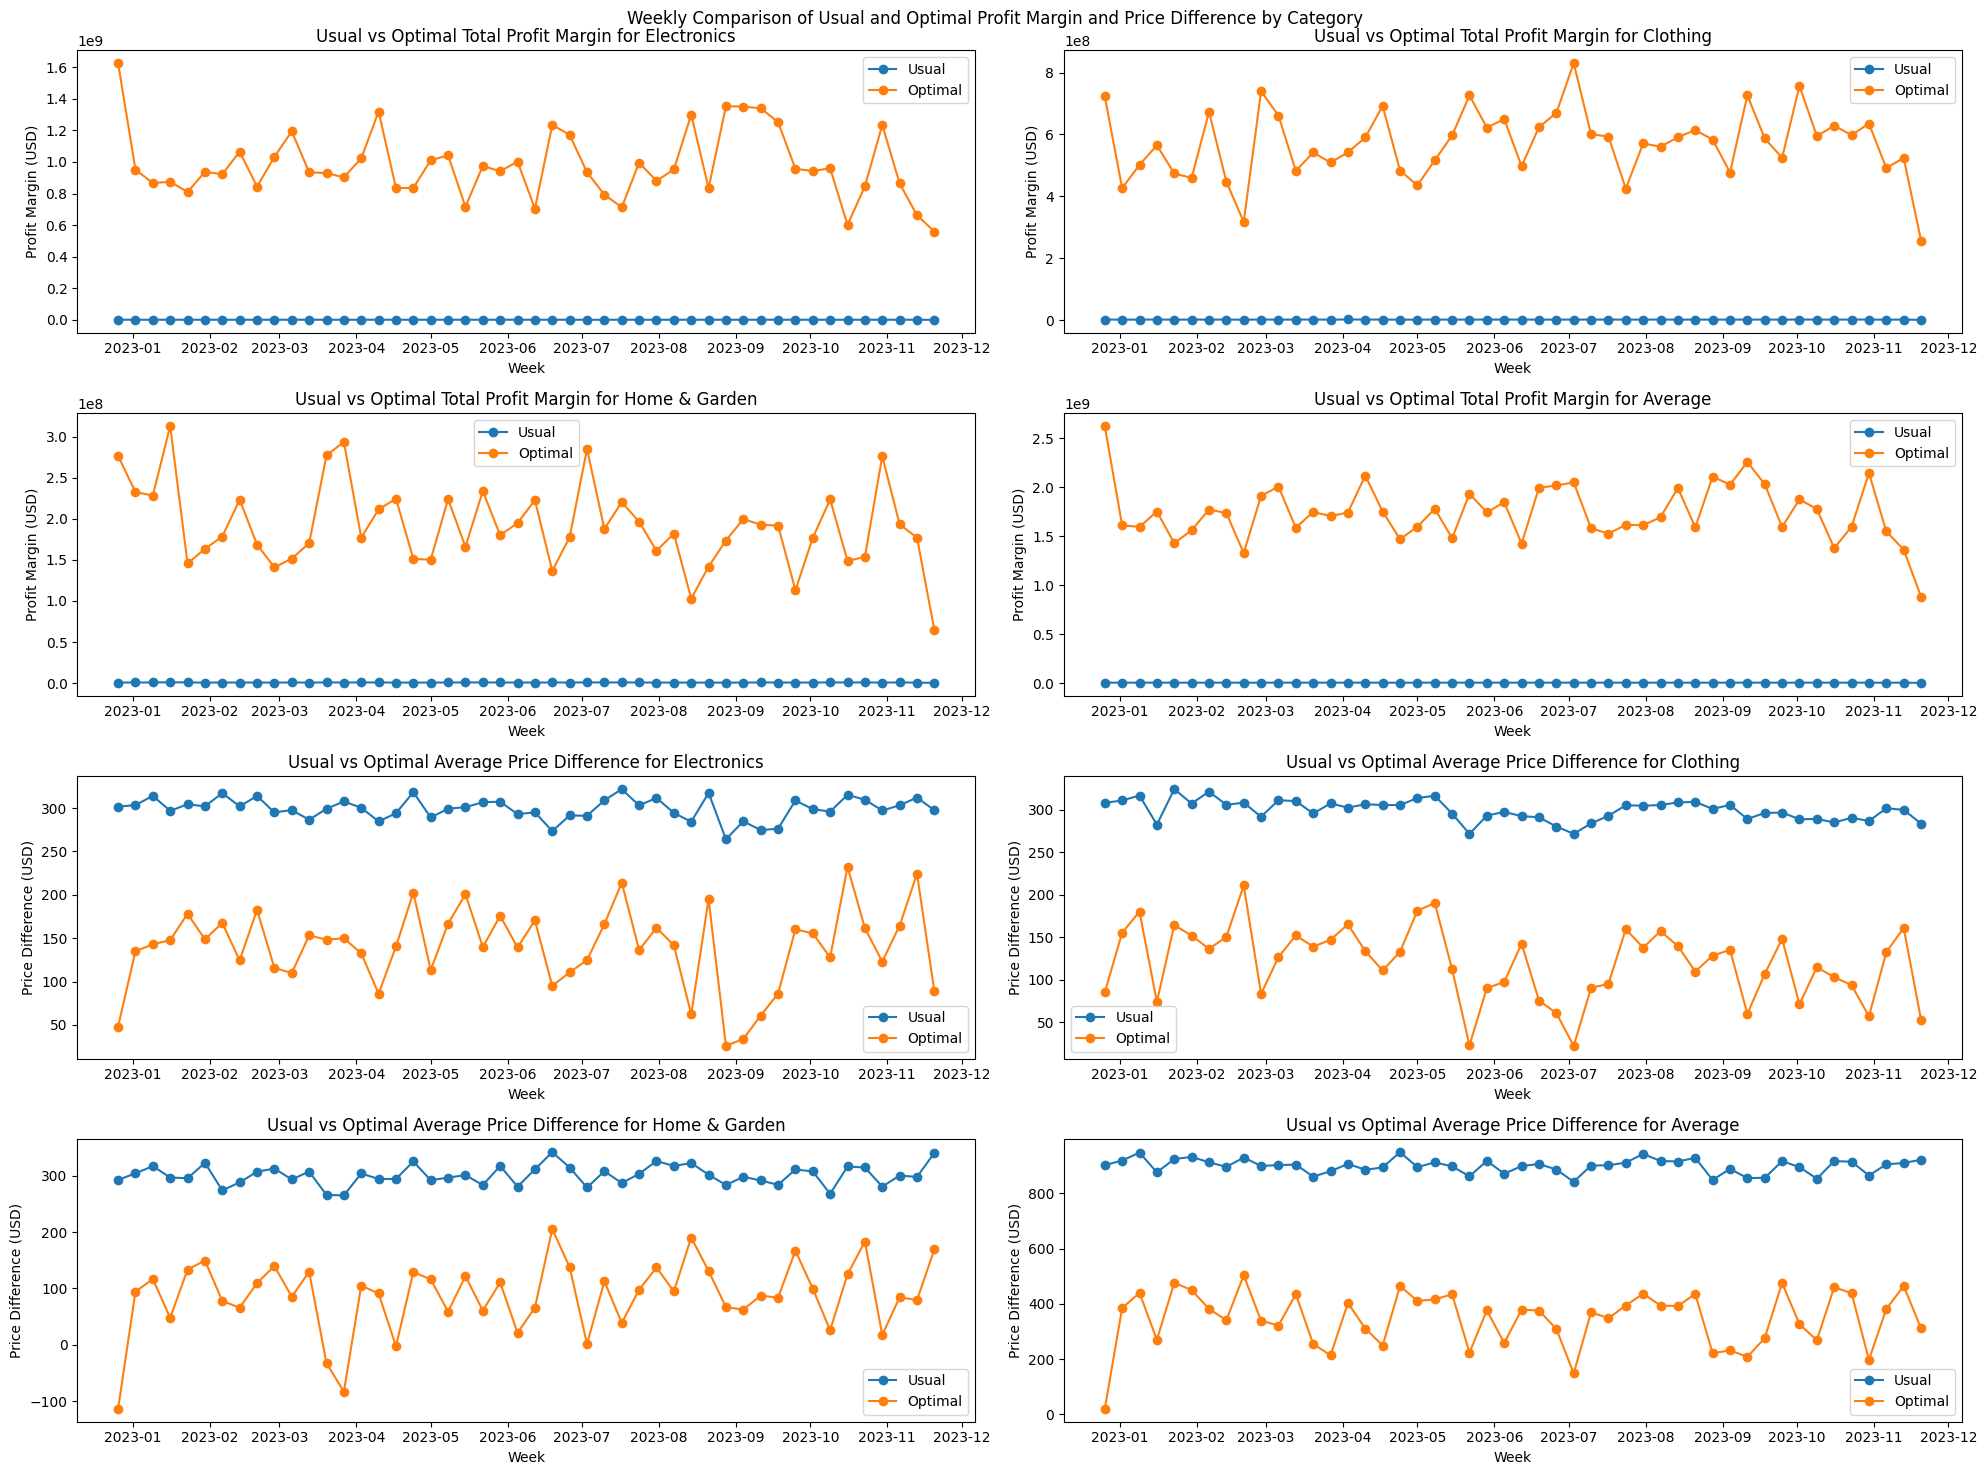

In [34]:
result_dates = [pd.to_datetime(week.split('/')[0]).date() for week in price_optimization_data]

# Create a figure with 4 rows and 2 columns of subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 15))

axes_flat = iter(axes.flat)

# Set the title of the figure
fig.suptitle('Weekly Comparison of Usual and Optimal Profit Margin and Price Difference by Category')

plot_types = ['Profit_Margin', 'Price_Difference']
plot_categories = ['Electronics', 'Clothing', 'Home & Garden', 'Average']

for pt in plot_types:
    for pc in plot_categories:
        ax = next(axes_flat)
        ax.plot(result_dates, weekly_optimization_result[f'{pt}_Usual_{pc}'], label='Usual', marker='o')
        ax.plot(result_dates, weekly_optimization_result[f'{pt}_Optimal_{pc}'], label='Optimal', marker='o')
        ax.set_xlabel('Week')
        if pt == 'Profit_Margin':
            ax.set_ylabel('Profit Margin (USD)')
            ax.set_title(f"Usual vs Optimal Total Profit Margin for {pc}")
        else:
            ax.set_ylabel('Price Difference (USD)')
            ax.set_title(f"Usual vs Optimal Average Price Difference for {pc}")
        ax.legend(['Usual', 'Optimal'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

As seen for the first four plots, we can obviously see that the prifit margins increase for Electronics, Clothing and Home & Garden as well as the total profit margin in all. This is visible because the orange lines are above the blue lines. 

Also, from the last four plots, we can see the difference between competitor prices and selling prices (using the old approach), and competitor prices and optimal price (using the new approach). The optimial difference (orange line) is now lower, meaning our pricing is now better in this case.

## 8. Conclusion

We've been able to identify ways to both forecast sales, and also define optimal pricing model to improve profitability.